**Housing Prices Solution[Top 2%]**
> Includes Detailed EDA, different Regression models and Ensembling

> 1. <a href='#1. Loading and Exploring Data'>Loading and Exploring Data</a>
     *  <a href='#step1'>Loading Libraries and gathering data sets, target(SalesPrice) and index of each target</a>  
     *  <a href='#step2'>Visualizing SalesPrice and heatmap of top correlations</a> 
     *  <a href='#step3'>Analysing highly correlated feature with sales price</a>    
>2. <a href='#step2'>Cleanup of data and Handling missing values</a>
     *   <a href='#step2.1'>Viewing information about all features </a>     
     *   <a href='#step2.2'>Assigning cleanup numbers for each characteristic of each feature</a>
 >3. <a href='#step3'>Analyzing Features having Object data type</a>
     * <a href='#step3.1'>Dropping Categorical Features with most missing values</a>
     * <a href='#step3.2'>Handling missing Features</a>              
 >4. <a href='#step4'>Analyzing non-Categorical Features</a>
     * <a href='#step4.1'>Handling missing values in Features </a>
         * <a href='#step4.1.a'>GarageYearBuilt </a>
         * <a href='#step4.1.b'>Garage Cars</a>
         * <a href='#step4.1.c'>Basement related features </a>
         * <a href='#step4.1.d'>Veneer </a>
         * <a href='#step4.1.e'>Bathrooms </a>
         * <a href='#step4.1.e'>Viewing information of Features after filling missing values logically</a> 
> 5. <a href='#step5'>Remaining Feature Engineering and EDA
    * <a href='#step5.1'>Impute Remaining missing values</a>
    * <a href='#step5.2'> Looking for skewness, outliers and distribution type of each categorical feature</a>
    * <a href='#step5.3'> Converting some non object data types to object, since its numerical value is not to significant</a>
    * <a href='#step5.4'>One Hot Encoding</a>
    * <a href='#step5.5'>Heatmap of correlations</a>
    * <a href='#step5.6'>Observing variable importances using Random Forest</a>
        * <a href='#step5.6.1'>correlation between all Areas</a>
        * <a href='#step5.6.2'>correlation between Quality variables</a>
        * <a href='#step5.6.3'>correlation between Basement variables</a>
        * <a href='#step5.6.4'>correlation between Garage variables</a>
        * <a href='#step5.6.5'>correlation between Bathroom variables</a>
    * <a href='#step5.7'>Handling features related to years</a>
    * <a href='#step5.8'>Handling feature Neighbourhood</a>
    * <a href='#step5.9'>Handling features related to Porch Area</a>
    * <a href='#step5.10'>Creating feature Total Area</a>
    * <a href='#step5.11'>Handling Collinearity</a>
    * <a href='#step5.12'>Handling Skewness</a>
    * <a href='#step5.13'>One Hot Encoding</a>
6. <a href='#step6'>Creating Models with Grid Search</a>
    * <a href='#step6.1'>Ridge Regression</a>
    * <a href='#step6.2'>Lasso Regression</a>
    * <a href='#step6.3'>Elastic Net</a>
    * <a href='#step6.4'>SVR</a>
    * <a href='#step6.5'>XGBoost</a>
    * <a href='#step6.6'>Gradient Boost Regressor</a>
    * <a href='#step6.7'>Saving Models and training them</a>
    * <a href='#step6.8'>Stacking all models</a>
    
7. <a href='#step7'>Ensembling and Obtaining result</a>
8. <a href='#step8'>References</a>

<a id='1. Loading and Exploring Data'></a>
1. Loading and Exploring Data
    <a id='step1'></a>
    *     Loading Libraries and gathering data sets, target(SalesPrice) and index of each target 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

import os
iowa_file_path1 = '../input/home-data-for-ml-course/train.csv'
iowa_file_path2 ="../input/home-data-for-ml-course/test.csv"

home_data = pd.read_csv(iowa_file_path1)
test_data=pd.read_csv(iowa_file_path2)

print(home_data.isnull().sum().sum())

6965


In [2]:

train_data=home_data.drop(['SalePrice'], axis=1)
target= home_data['SalePrice']
Id=test_data['Id']

<a id='step2'></a>

* Visualizing SalesPrice and heatmap of top correlations

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

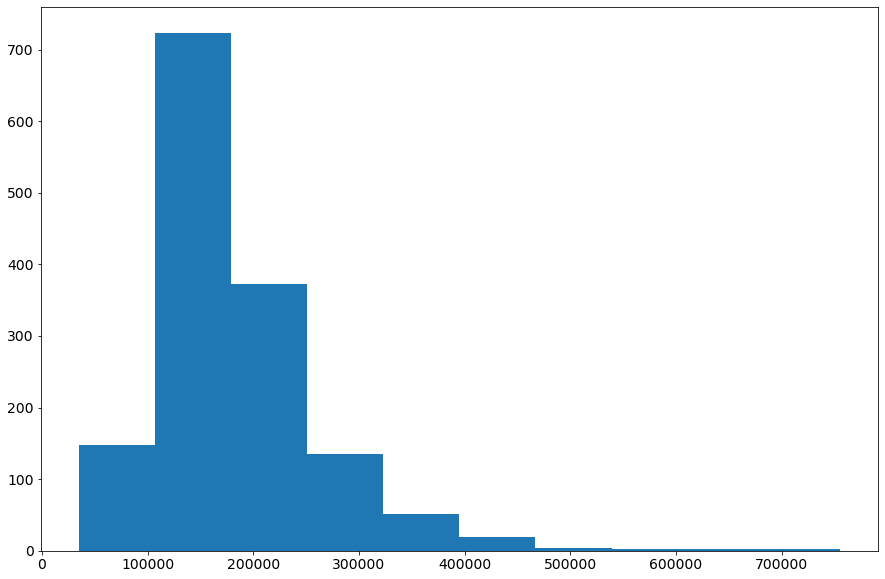

In [3]:

fig = plt.figure(figsize = (15,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.hist(home_data['SalePrice'])
home_data['SalePrice'].describe()

> Sales price is right skewed, log transformation is applied to attain less skewness for better model training and better accuracy of predicting at end of EDA

**heat map**

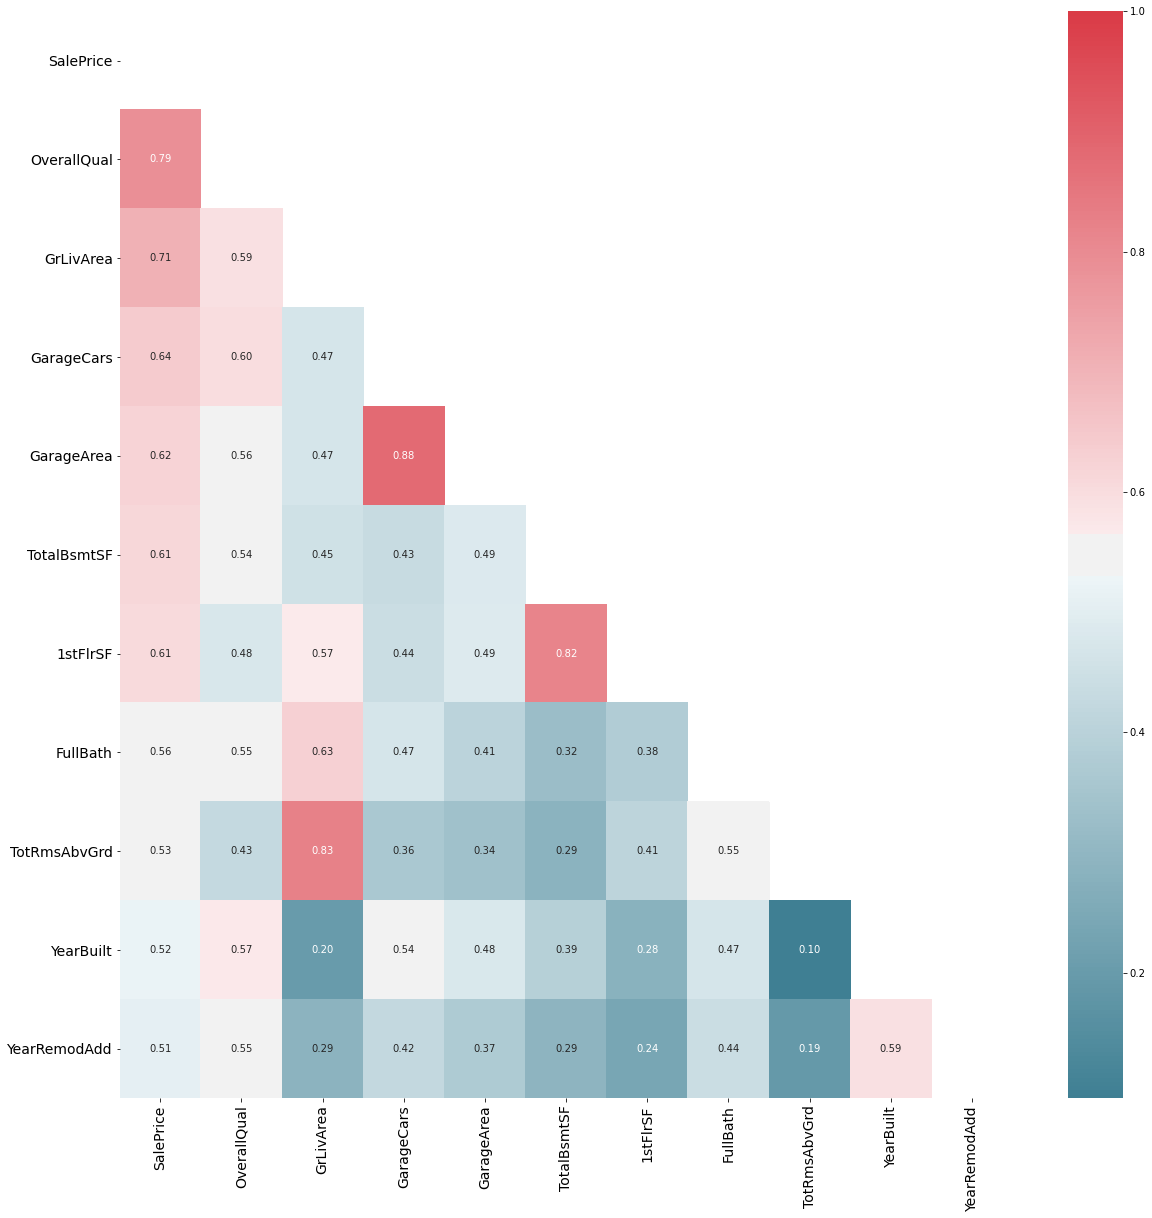

In [4]:
from matplotlib import pyplot as plt
inputs= pd.concat([train_data,target], axis=1)
corr = inputs[inputs.SalePrice>1].corr()
top_corr_cols = corr[abs((corr.SalePrice)>=0.5)].SalePrice.sort_values(ascending=False).keys()

# print(top_corr_cols)

top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
# print(dropSelf)

dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(20,20))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=0.5)
plt.show()
del corr, dropSelf, top_corr

<a id='step3'></a>

* **Analysing highly correlated feature with sales price**

     OverallQuality

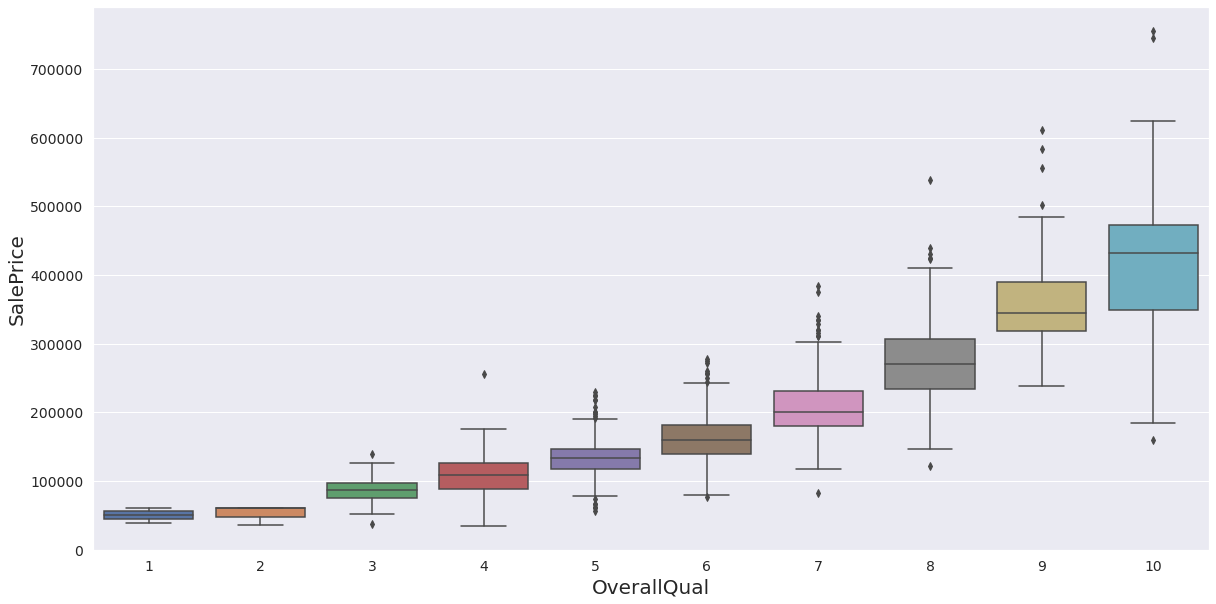

In [5]:
plt.figure(figsize=(20,10))
plt.xlabel('OverallQual', fontsize=20)
plt.ylabel('SalePrice', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

sns.boxplot(x= home_data['OverallQual'], y= target)



    GroundLiving Area

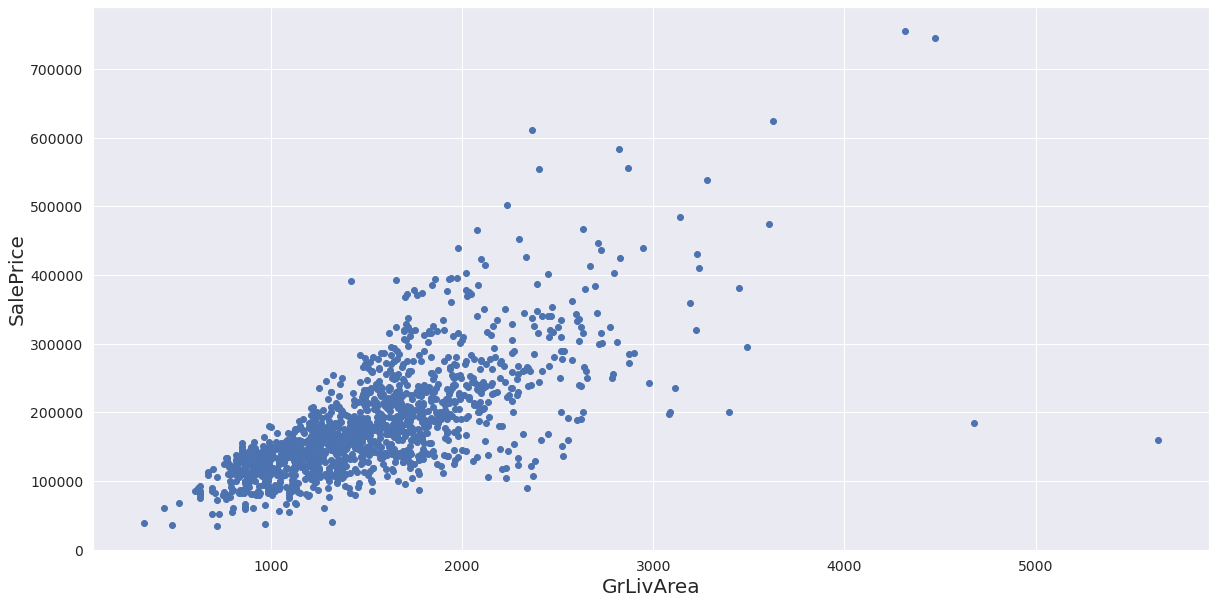

In [6]:
plt.figure(figsize=(20,10))
plt.xlabel('GrLivArea', fontsize=20)
plt.ylabel('SalePrice', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.scatter(x= home_data['GrLivArea'], y= target)

     Obtaining outliers from plot 

In [7]:
data= home_data.loc[(home_data['GrLivArea']>4000) & (home_data['SalePrice']< 200000)]
print(data['Id'])            
           

523      524
1298    1299
Name: Id, dtype: int64


<a id='step2'></a>

2. **Cleanup of data and Handling missing values**

<a id='step2.1'></a>
>      2.1. Viewing information about all features

In [8]:
# print(home_data.describe())
print('Info of input:\n',home_data.info())
print('Info of test data:\n',test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<a id='step2.2'></a>
>     2.2 Assigning cleanup numbers for each characteristic of each feature

In [9]:
# Quality and condition columns are to be numerically encoded 

cleanup_nums = {"ExterQual":     {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
            "ExterCond":     {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
            "HeatingQC":       {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
            "KitchenQual":     {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
            "CentralAir":     {"Y": 1, "N": 0},
# below features also have missing values that can be replaced by 0
    "BsmtQual":      {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0},
    "BsmtCond":      {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0},
    "BsmtExposure":    {"Gd":4, "Av":3 , "Mn":2, "No":1, "NA":0},
    "BsmtFinType1":    {"None":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6},
    "BsmtFinType2":    {"None":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6},
    "FireplaceQu":     {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0},
    "GarageQual":      {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0},
    "GarageCond":      {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0},
    'GarageFinish':    {'Fin':3,'RFn':2, 'Unf':1, 'None':0},
    "PoolQC":     {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0}}


In [10]:
train_data.replace(cleanup_nums, inplace=True)
test_data.replace(cleanup_nums, inplace=True)

train_data[['PoolQC','FireplaceQu','GarageQual','GarageCond',
            'GarageFinish','BsmtQual','BsmtCond',"BsmtExposure","BsmtFinType1",
            "BsmtFinType2"]]=train_data[['PoolQC','FireplaceQu', 'GarageQual',
                        'GarageCond','GarageFinish','BsmtQual',
                        'BsmtCond', "BsmtExposure","BsmtFinType1",
                                         "BsmtFinType2"]].fillna(0)

test_data[['PoolQC','FireplaceQu','GarageQual','GarageCond',
           'GarageFinish','BsmtQual','BsmtCond', "BsmtExposure","BsmtFinType1",
           "BsmtFinType2"]]=test_data[['PoolQC','FireplaceQu', 'GarageQual',
                                'GarageCond','GarageFinish',
                                'BsmtQual','BsmtCond',"BsmtExposure",
                                "BsmtFinType1","BsmtFinType2"]].fillna(0)

print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<a id='step3'></a>

3. Analyzing Features having Object data type

In [11]:
print(train_data['Alley'].unique(),'\n',train_data['Alley'].describe(),'\n')

print(train_data['Utilities'].unique(),'\n',train_data['Utilities'].describe(),'\n')

print(train_data['MasVnrType'].unique(),'\n',train_data['MasVnrType'].describe(),'\n')

print(train_data['Fence'].unique(),'\n',train_data['Fence'].describe(),'\n')

print(train_data['MiscFeature'].unique(),'\n',train_data['MiscFeature'].describe(),'\n')

print(train_data['Functional'].unique(),'\n',train_data['Functional'].describe(),'\n')

print(train_data["GarageType"].unique(),'\n',train_data["GarageType"].describe(),'\n')




[nan 'Grvl' 'Pave'] 
 count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object 

['AllPub' 'NoSeWa'] 
 count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object 

['BrkFace' 'None' 'Stone' 'BrkCmn' nan] 
 count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object 

[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw'] 
 count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object 

[nan 'Shed' 'Gar2' 'Othr' 'TenC'] 
 count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object 

['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev'] 
 count     1460
unique       7
top        Typ
freq      1360
Name: Functional, dtype: object 

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types'] 
 count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object 



<a id='step3.1'></a>

     3.1. Dropping Categorical Features with most missing values

In [12]:
train_data.drop(['Utilities'], axis=1, inplace=True)
test_data.drop(['Utilities'], axis=1, inplace=True)


<a id='step3.2'></a>

    3.2.Handling missing Features and analysing 

Text(0.5, 0, 'Barplot of GarageFinish')

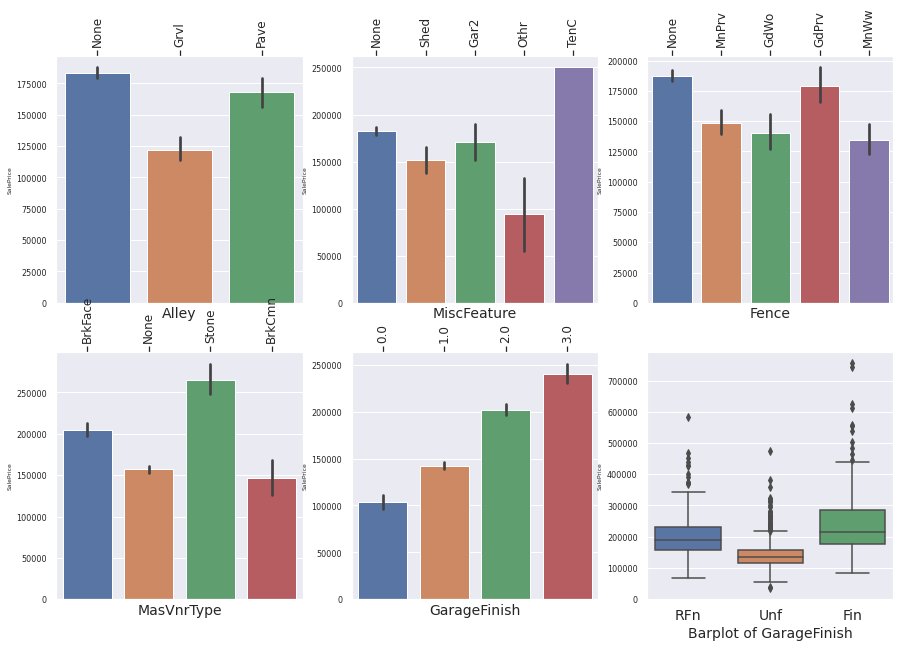

In [13]:
# print(train_data['LotFrontage'].head())

train_data[['Alley','MiscFeature','Fence','MasVnrType',"GarageType"]]=train_data[['Alley', 'MiscFeature',
                        'Fence', 'MasVnrType',"GarageType"]].fillna("None")

test_data[['Alley', 'MiscFeature','Fence', 'MasVnrType',"GarageType"]]=test_data[['Alley', 'MiscFeature',
                     'Fence', 'MasVnrType',"GarageType"]].fillna("None")


data=train_data[['Alley', 'MiscFeature','Fence', 'MasVnrType', 'GarageFinish']]
j=1
fig=plt.figure(figsize=(15,10))
for i in data.columns:
    if j<=5:
        ax1 = fig.add_subplot(2,3,j)
        sns.barplot(data= data, x=i, y=target, ax = ax1, label=i)
        plt.xlabel(i,fontsize=14)
        ax1.xaxis.set_ticks_position('top')
        plt.xticks(rotation='vertical', fontsize=12) 
        plt.yticks(fontsize=8)
        
    j+=1
ax1 = fig.add_subplot(2,3,6)  
sns.boxplot(x= home_data['GarageFinish'], y= target)
plt.xticks(fontsize=14)
plt.yticks(fontsize=8)
plt.xlabel('Barplot of GarageFinish', fontsize=14)




In [14]:
print(test_data['Exterior1st'].unique(),'\n',test_data['Exterior1st'].describe(),'\n')

print(test_data['Exterior2nd'].unique(),'\n',test_data['Exterior2nd'].describe(),'\n')

print(test_data['SaleType'].unique(),'\n',test_data['SaleType'].describe())

['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock'] 
 count        1458
unique         13
top       VinylSd
freq          510
Name: Exterior1st, dtype: object 

['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn' nan
 'Stone'] 
 count        1458
unique         15
top       VinylSd
freq          510
Name: Exterior2nd, dtype: object 

['WD' 'COD' 'New' 'ConLD' 'Oth' 'Con' 'ConLw' 'ConLI' 'CWD' nan] 
 count     1458
unique       9
top         WD
freq      1258
Name: SaleType, dtype: object


> the above missing values of features are handled by filling with most frequent characteristic

<a id='step4'></a>

4.Analyzing non-Categorical Features</a>

    4.1.Handling missing values in Features

<a id='step4.1.a'></a>

         4.1.a. Garage Year Built

In [15]:
train_data.loc[train_data['GarageYrBlt'].isnull(),
               'GarageYrBlt']=train_data['YearBuilt']

test_data.loc[test_data['GarageYrBlt'].isnull(),
              'GarageYrBlt']=test_data['YearBuilt']

<a id='step4.1.b'></a>

    4.1.b. Garage Cars:
    Setting car count zero for examples having no garage

In [16]:
# looking for id with no garage
data1= test_data.loc[(test_data['GarageArea'].isnull())]
print(data1['Id'])


1116    2577
Name: Id, dtype: int64


In [17]:
test_data.loc[1116,'GarageCars']=0
print(test_data.loc[1116,'GarageType'],'\n')


Detchd 



<a id='step4.1.c'></a>

    4.1.c. Basement related Features:
    Handling missing values in basement features for houses with no basement and veneer

In [18]:
#looking for id with no basement
data2= test_data.loc[((test_data['BsmtFinSF1'].isnull())&(test_data['BsmtFinSF2'].isnull())&
                      (test_data['BsmtFullBath'].isnull())&(test_data['BsmtHalfBath'].isnull()))]

print(data2[['Id','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
        'BsmtFinType2','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','BsmtUnfSF',
             'BsmtFullBath','BsmtHalfBath']],'\n')



       Id  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
660  2121       0.0       0.0           0.0           0.0           0.0   

     BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  BsmtUnfSF  BsmtFullBath  \
660         NaN         NaN          NaN        NaN           NaN   

     BsmtHalfBath  
660           NaN   



In [19]:
## updating values for no basement condition
test_data.loc[660 ,'BsmtFullBath']=0
test_data.loc[660 ,'BsmtHalfBath']=0
test_data.loc[660 ,'BsmtFinSF1']=0
test_data.loc[660 ,'BsmtFinSF2']=0
test_data.loc[660 ,'TotalBsmtSF']=0
test_data.loc[660 ,'BsmtUnfSF']=0

<a id='step4.1.d'></a>

       4.1.d. Veneer:
       Setting Area of veneer as 0 for examples with no veneer

In [20]:
data3= test_data.loc[(test_data['MasVnrType']=='None')]
print(data3['MasVnrArea'].isnull().sum(),data3[['MasVnrType','MasVnrArea']].shape )

15 (894, 2)


In [21]:

test_data.loc[test_data['MasVnrType']=='None', 'MasVnrArea']=0


<a id='step4.1.e'></a>

    4.1.e. Bathroom features:
    Filling missing bathroom values with 0

In [22]:
test_data['BsmtFullBath']=test_data['BsmtFullBath'].fillna(0)
test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna(0)

<a id='step4.1.f'></a>

        4.1.f. Viewing information of Features after filling missing values logically

In [23]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<a id='step5'></a>
**Remaining Feature Engineering and EDA**
<a id='step5.1'></a>

    5.1. Impute remaining missing values

In [24]:
#collecting categorical data columns

category=(train_data.select_dtypes(include=['object']).copy()).columns
non_category=list( set(train_data.columns) - set(category))

print('non_categorical columns: \n',non_category)
print('categorical columns: \n',category )



non_categorical columns: 
 ['BsmtCond', 'BsmtHalfBath', 'YearBuilt', 'GarageFinish', 'Id', '1stFlrSF', 'BedroomAbvGr', 'KitchenQual', 'GrLivArea', 'HalfBath', 'TotalBsmtSF', 'ScreenPorch', 'BsmtFinSF2', 'GarageCond', 'HeatingQC', 'MoSold', 'GarageYrBlt', 'OpenPorchSF', '2ndFlrSF', 'MasVnrArea', 'BsmtFinType1', 'ExterQual', 'GarageCars', 'LowQualFinSF', 'YrSold', 'OverallQual', 'CentralAir', 'LotFrontage', 'BsmtQual', 'WoodDeckSF', 'LotArea', 'PoolArea', 'BsmtFullBath', 'MSSubClass', 'PoolQC', 'FullBath', 'KitchenAbvGr', 'YearRemodAdd', 'OverallCond', 'ExterCond', 'BsmtExposure', 'TotRmsAbvGrd', 'Fireplaces', 'BsmtUnfSF', 'BsmtFinType2', 'BsmtFinSF1', 'GarageQual', '3SsnPorch', 'MiscVal', 'FireplaceQu', 'EnclosedPorch', 'GarageArea']
categorical columns: 
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    

In [25]:
train_data[category]=train_data[category].fillna(train_data[category].mode().iloc[0])
test_data[category]=test_data[category].fillna(test_data[category].mode().iloc[0])

train_data[non_category]= train_data[non_category].fillna(train_data[non_category].mean().iloc[0])
test_data[non_category]= test_data[non_category].fillna(test_data[non_category].mean().iloc[0])

print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<a id='step5.2'></a>

    5.2. Looking for skewness, outliers and distribution type of each categorical feature

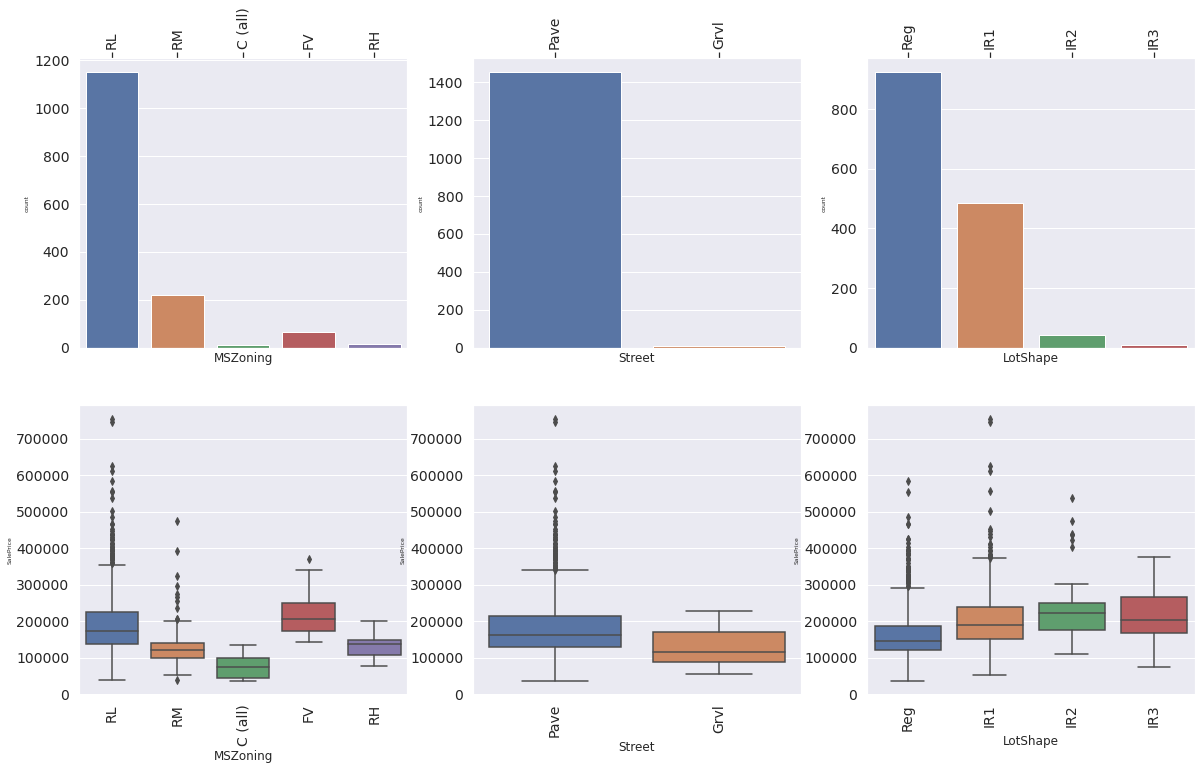

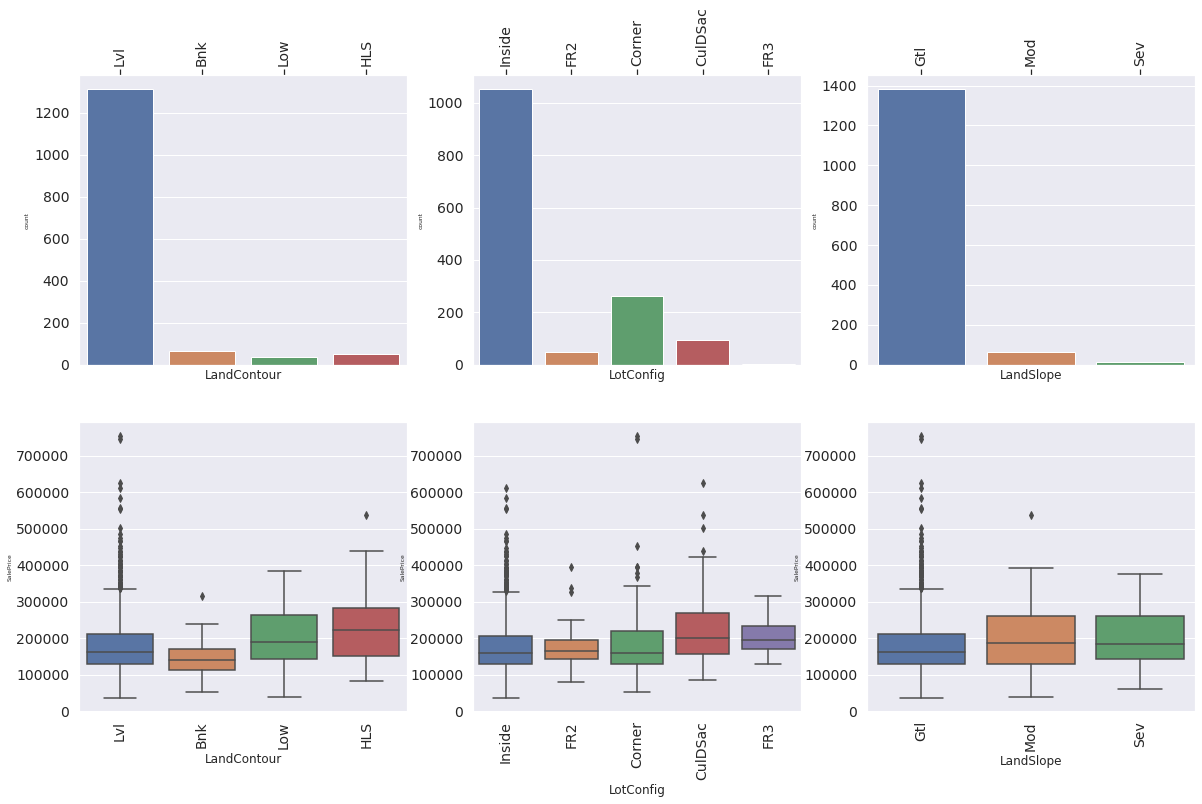

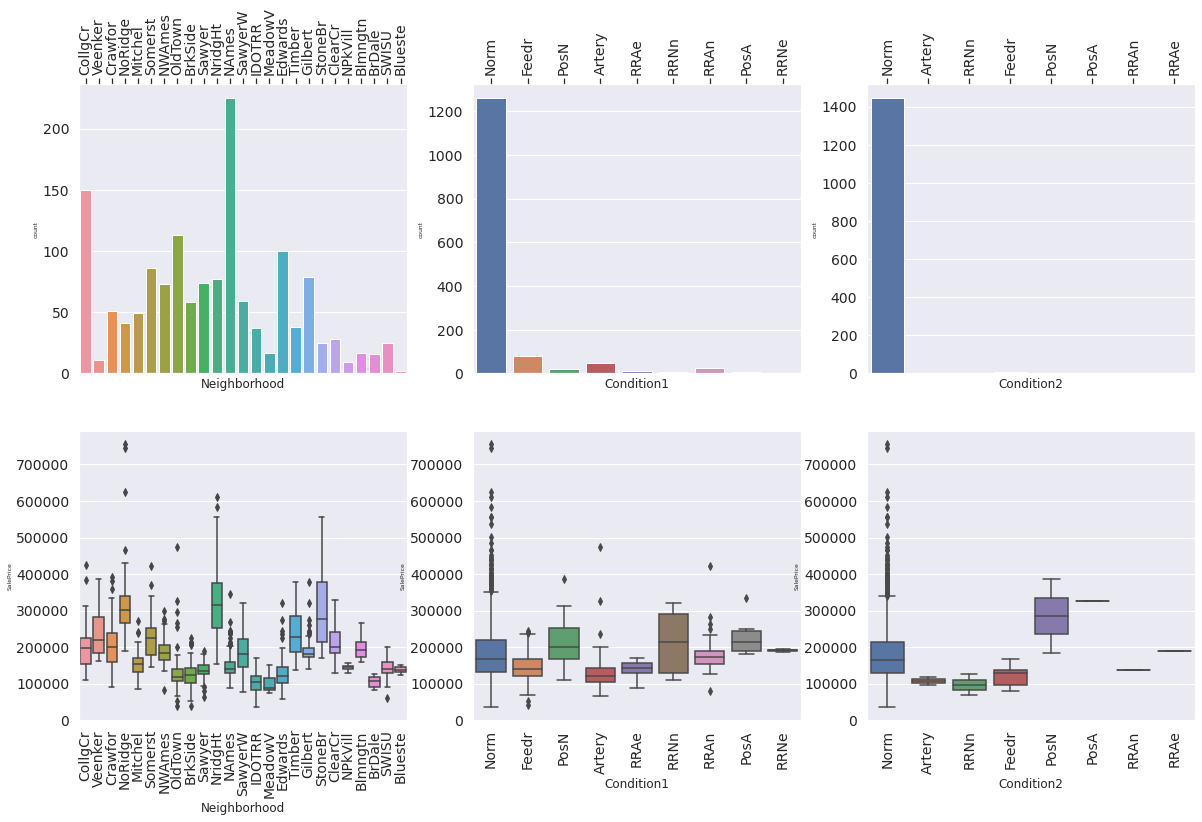

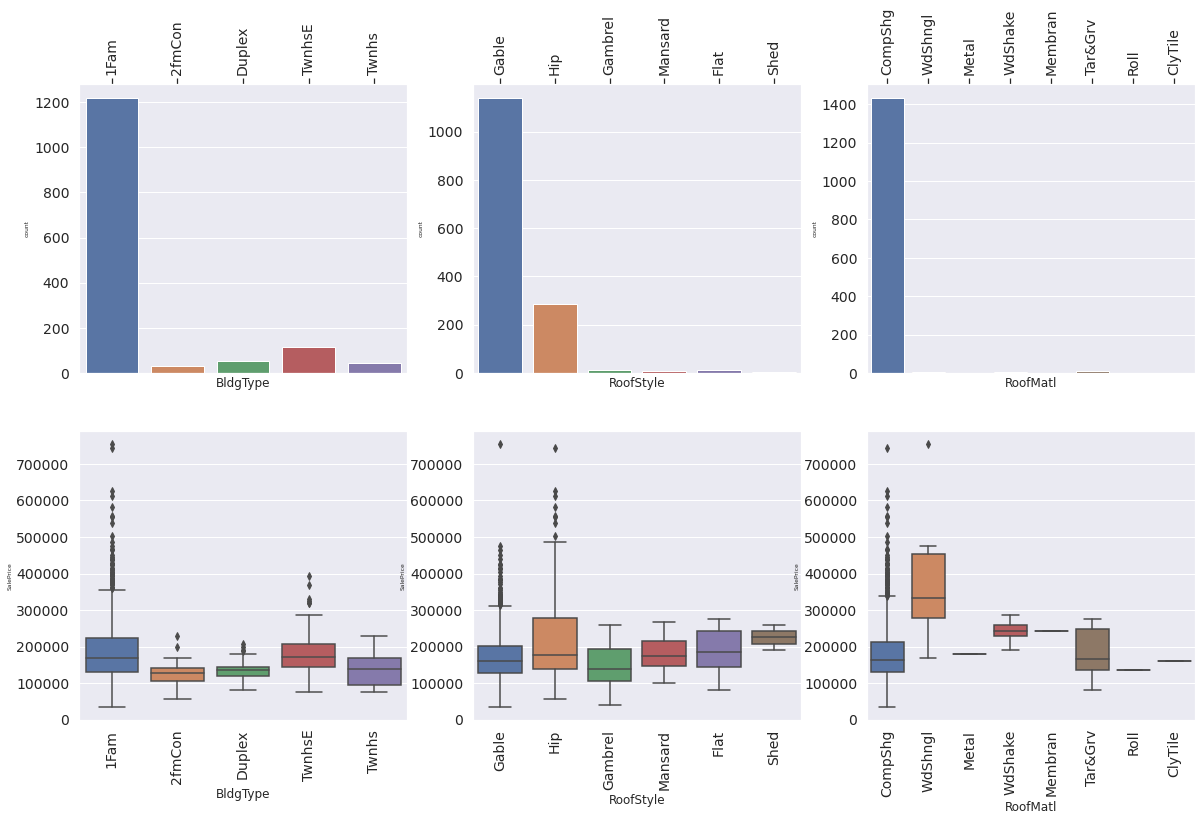

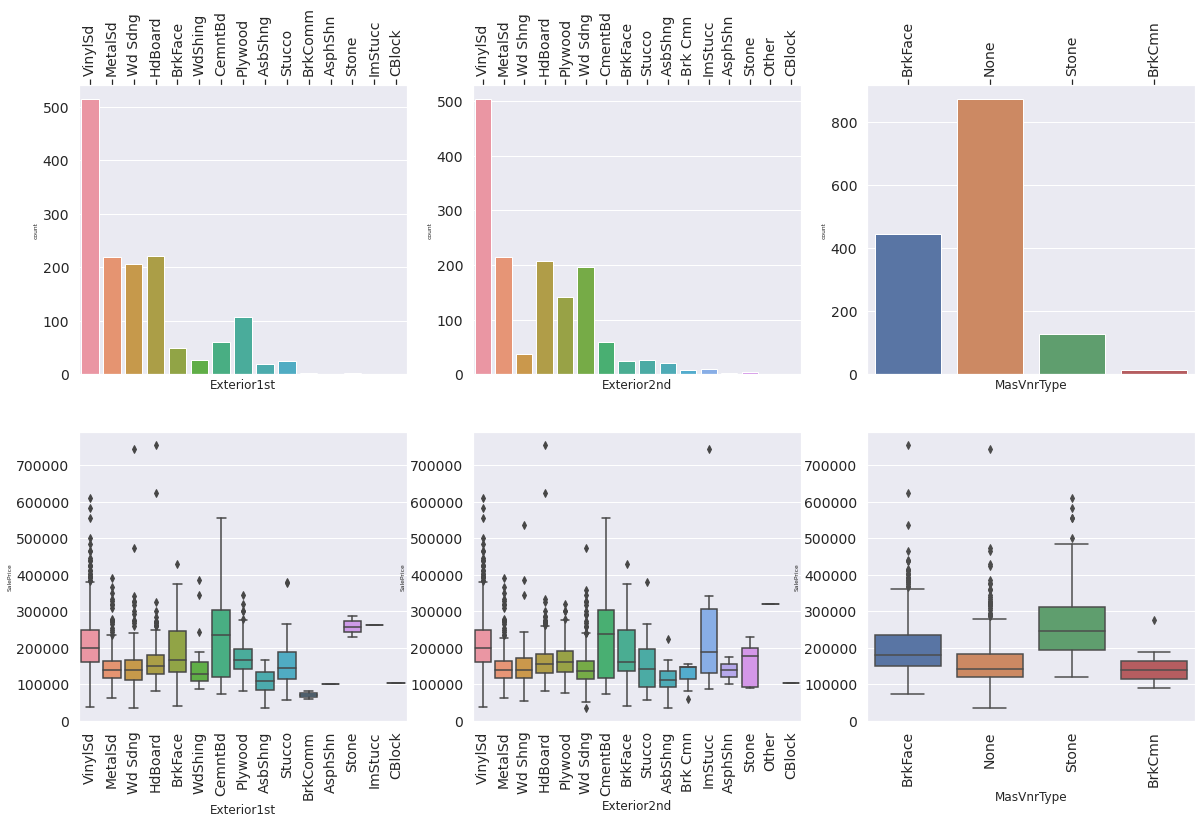

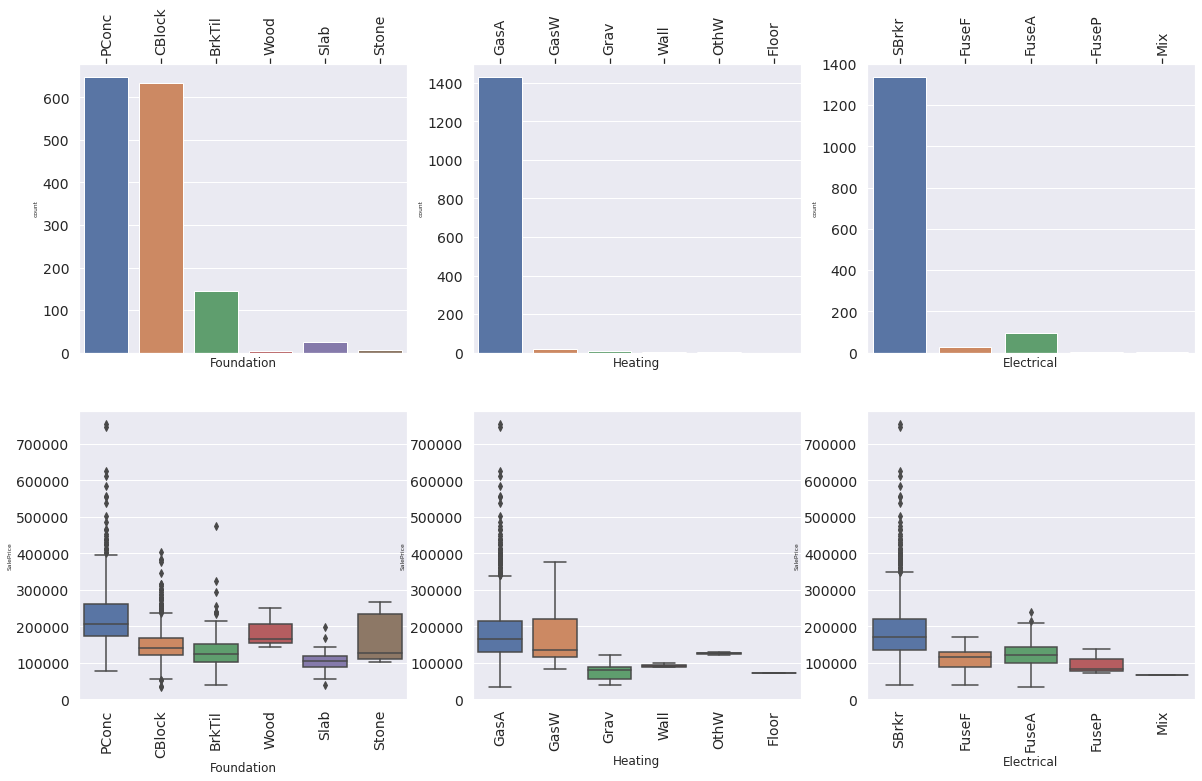

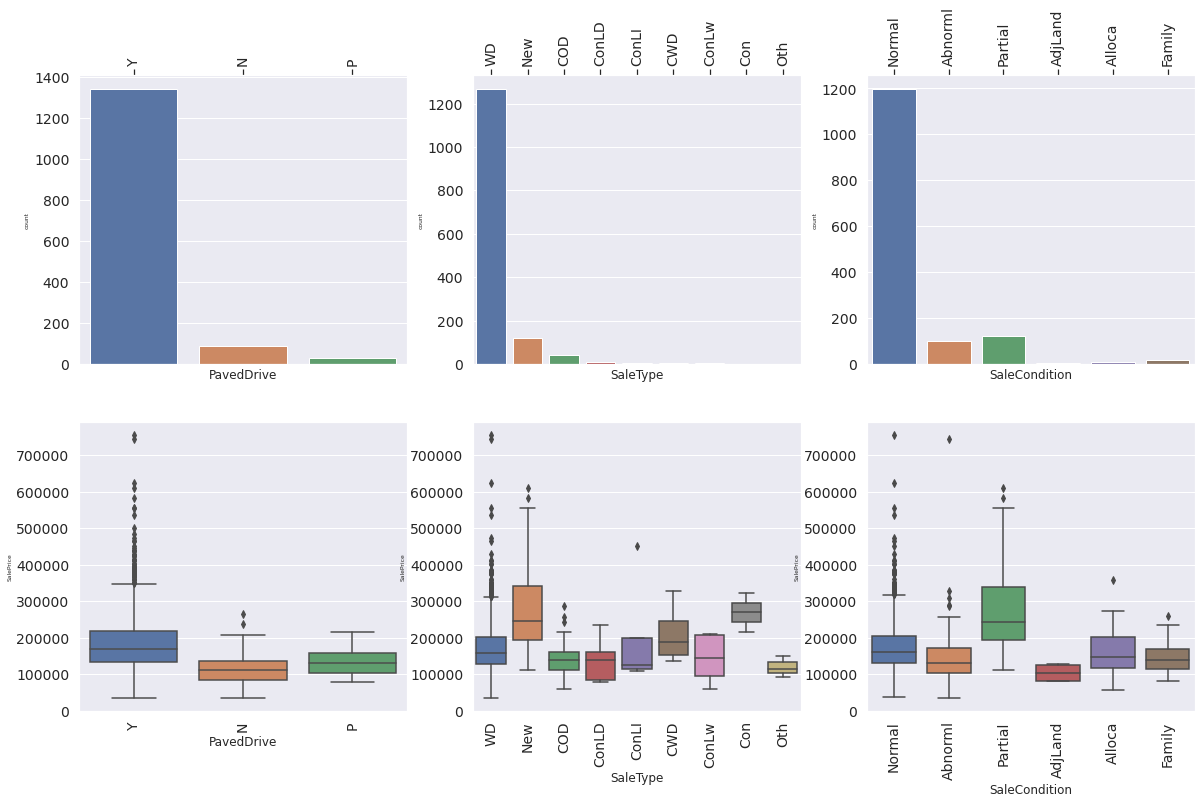

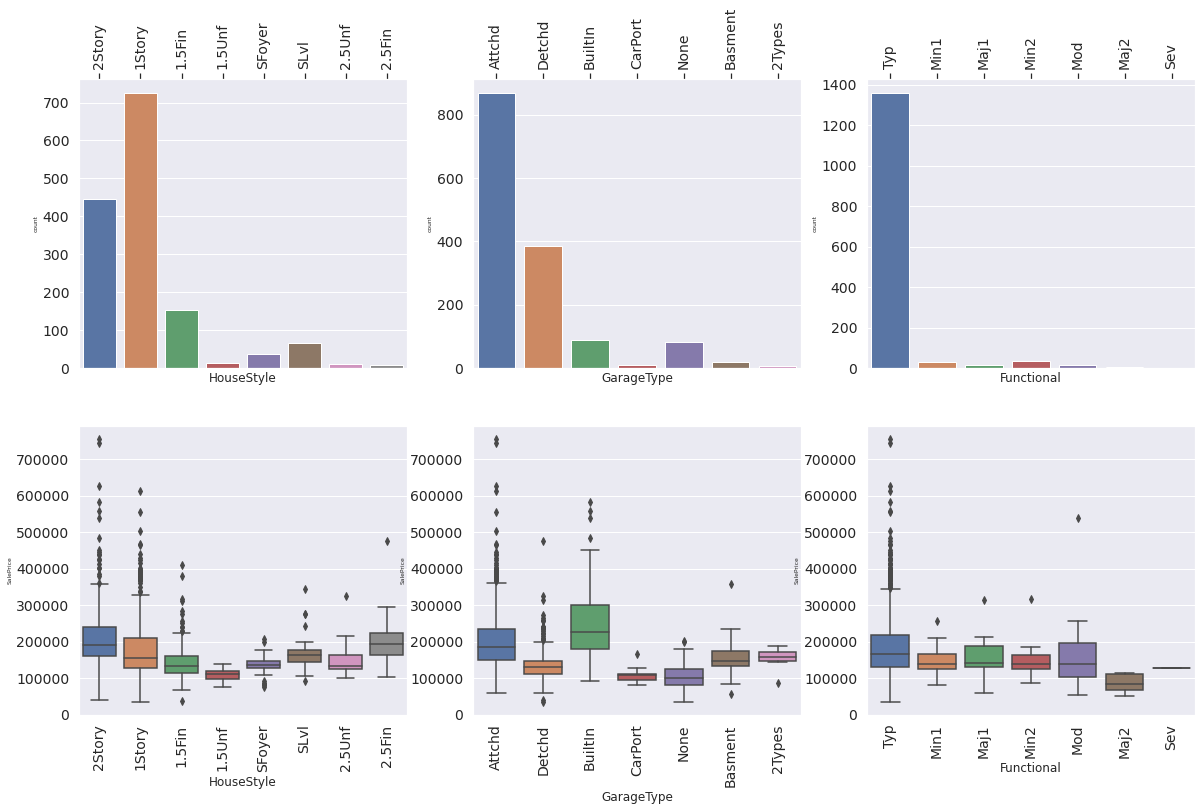

<Figure size 1440x3600 with 0 Axes>

In [26]:
data1 = train_data[['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
            'Foundation', 'Heating', 'Electrical', 'PavedDrive',
                'SaleType', 'SaleCondition','HouseStyle','GarageType','Functional']]

data1=pd.concat([data1,target],axis=1)
# print(data.info())

i = 1
fig = plt.figure(figsize = (20,50))
for c in list(data1.columns):
    if i <= 3:
        if c != 'SalePrice':
            ax1 = fig.add_subplot(8,3,i)
            sns.countplot(data = data1, x=c, ax = ax1)
            plt.xlabel(c,fontsize=12)
            ax1.xaxis.set_ticks_position('top')
            plt.xticks(rotation='vertical',fontsize=14)
            plt.yticks(fontsize=14)

            
            ax2 = fig.add_subplot(8,3,i+3)
            sns.boxplot(data=data1, x=c, y='SalePrice', ax=ax2)
            plt.xlabel(c,fontsize=12)
            ax1.xaxis.set_ticks_position('top')
            plt.xticks(rotation='vertical',fontsize=14)
            plt.yticks(fontsize=14)

       
    i = i +1
    if i == 4: 
        fig = plt.figure(figsize = (20, 50))
        i =1

> There is a majority of each category in each feature and outliers are present for most of the categories for each feature. Neighbourhood feature has the highes number of categories

<a id='step5.3'></a>

    5.3. Converting some non object data types to object, since its numerical value is not to significant

In [27]:
train_data[['MSSubClass_o','YrSold_o','MoSold_o']]=train_data[['MSSubClass',
                                             'YrSold','MoSold']].astype('O')
test_data[['MSSubClass_o','YrSold_o','MoSold_o']]=test_data[['MSSubClass',
                                            'YrSold','MoSold']].astype('O')

final_categorical_cols=list(category) +['MSSubClass_o','YrSold_o','MoSold_o']
print(final_categorical_cols)

print(train_data.info())
print(test_data.info())

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass_o', 'YrSold_o', 'MoSold_o']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   LotCon

In [28]:
print(train_data['MSSubClass_o'].unique(),'\n',train_data['MSSubClass_o'].describe())
print(train_data['YrSold_o'].unique(),'\n',train_data['YrSold_o'].describe())
print(train_data['MoSold_o'].unique(),'\n',train_data['MoSold_o'].describe())


[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 
 count     1460
unique      15
top         20
freq       536
Name: MSSubClass_o, dtype: int64
[2008 2007 2006 2009 2010] 
 count     1460
unique       5
top       2009
freq       338
Name: YrSold_o, dtype: int64
[2 5 9 12 10 8 11 4 1 7 3 6] 
 count     1460
unique      12
top          6
freq       253
Name: MoSold_o, dtype: int64


<a id='step5.4'></a>    
    
    5.4. One Hot Encoding
> Since the test data has few categorical labels that are missing in train data,both data frames are concatinated and labels are found 

In [29]:
total_data =pd.concat([train_data,test_data],axis=0)
len=train_data.shape[0]
print('total length:',len)
non_object_data=pd.get_dummies(total_data, columns=final_categorical_cols,drop_first=True)

train_data_dummy= non_object_data[0:len]
test_data_dummy=non_object_data[len:]
print('all final columns after OneHotEncoding:\n',train_data.columns)

# data.head()

print(train_data_dummy.shape,test_data_dummy.shape)
test_data.isnull().sum().sum()

total length: 1460
all final columns after OneHotEncoding:
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea',

0

<a id='step5.5'></a> 

    5.5. Heatmap
> Visualizing correlation between columns after OHE

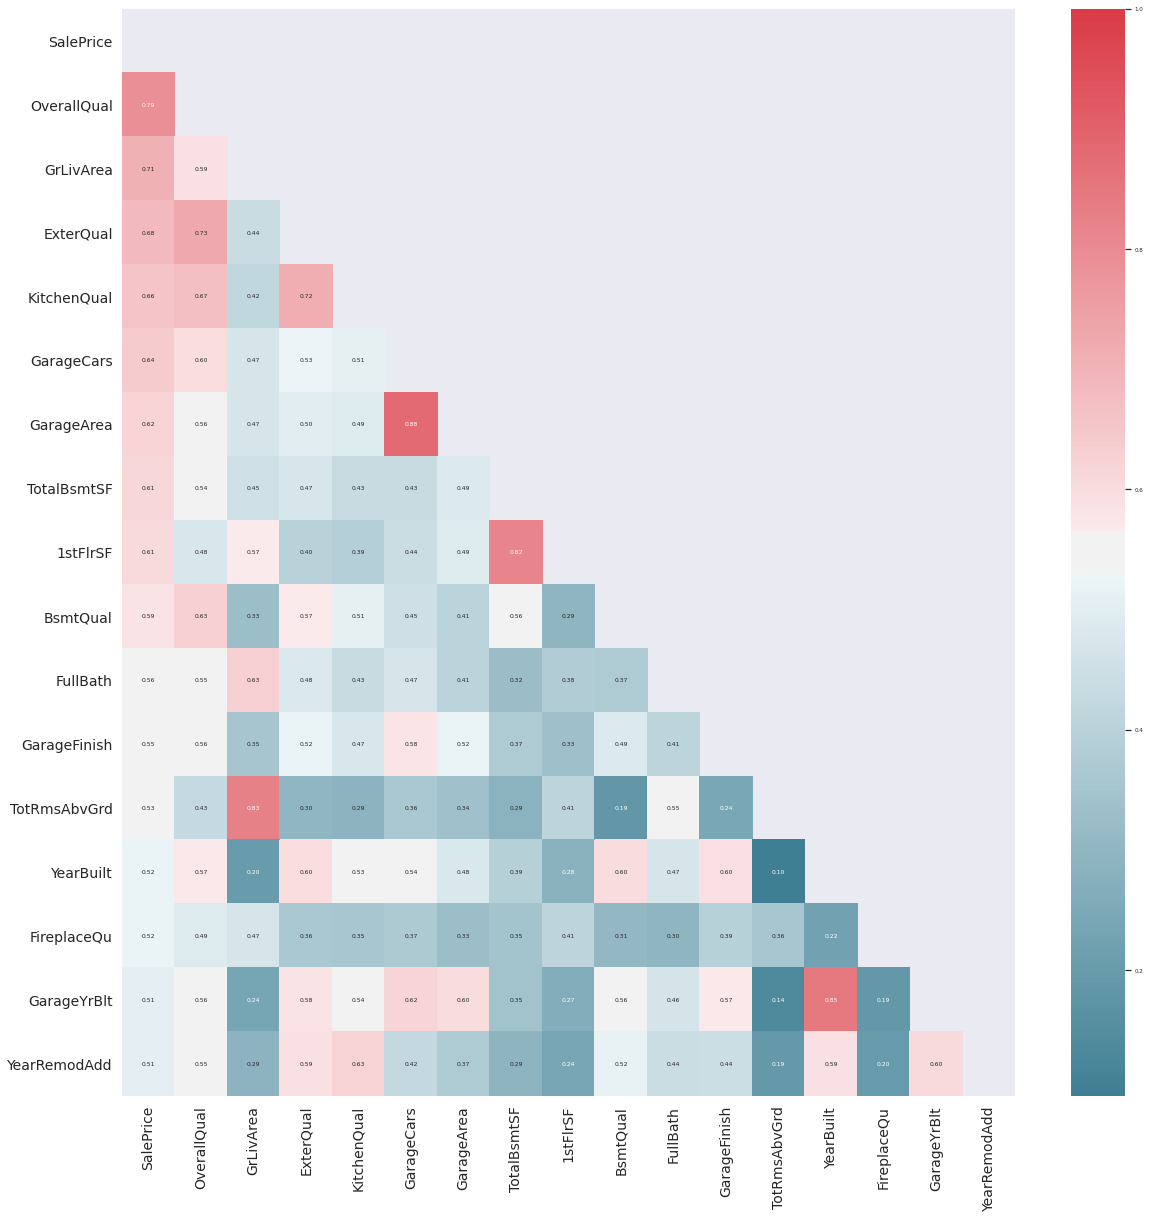

In [30]:
from matplotlib import pyplot as plt

inputs=pd.concat([home_data['SalePrice'],train_data_dummy],axis=1)
corr = inputs[inputs.SalePrice>1].corr()
top_corr_cols = corr[abs((corr.SalePrice)>=0.5)].SalePrice.sort_values(ascending=False).keys()

# print(top_corr_cols)

top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
# print(dropSelf)

dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(20,20))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1)
plt.show()
del corr, dropSelf, top_corr

<a id='step5.6'></a> 

    5.6. Observing variable importances using Random Forest

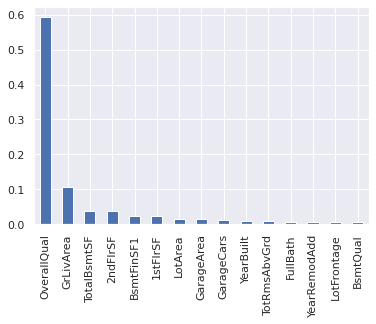

In [31]:
from sklearn.ensemble import RandomForestRegressor

input_data= train_data_dummy.drop(['Id'], axis=1)
test_data_dummy=test_data_dummy.drop(['Id'], axis=1)

rfr_imp= RandomForestRegressor(n_estimators=100)
rfr_imp.fit(input_data, target)

importance =pd.Series(rfr_imp.feature_importances_, index=input_data.columns)
importance.nlargest(15).plot(kind='bar')

<a id='step5.6.1'></a>

    5.6.1. Observing correlation between all Areas(Since many area features have high importance)

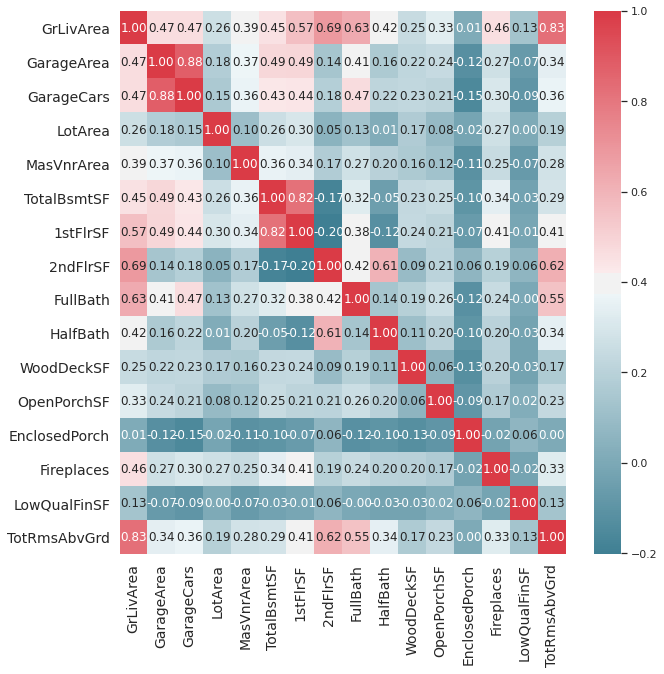

In [32]:
area=['GrLivArea','GarageArea','GarageCars','LotArea','MasVnrArea','TotalBsmtSF','1stFlrSF',
     '2ndFlrSF','FullBath','HalfBath','WoodDeckSF','OpenPorchSF','EnclosedPorch','Fireplaces',
      'LowQualFinSF','TotRmsAbvGrd']
corr = train_data[area].corr()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
sns.set(font_scale=1)
plt.show()


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text major ticklabel objects>)

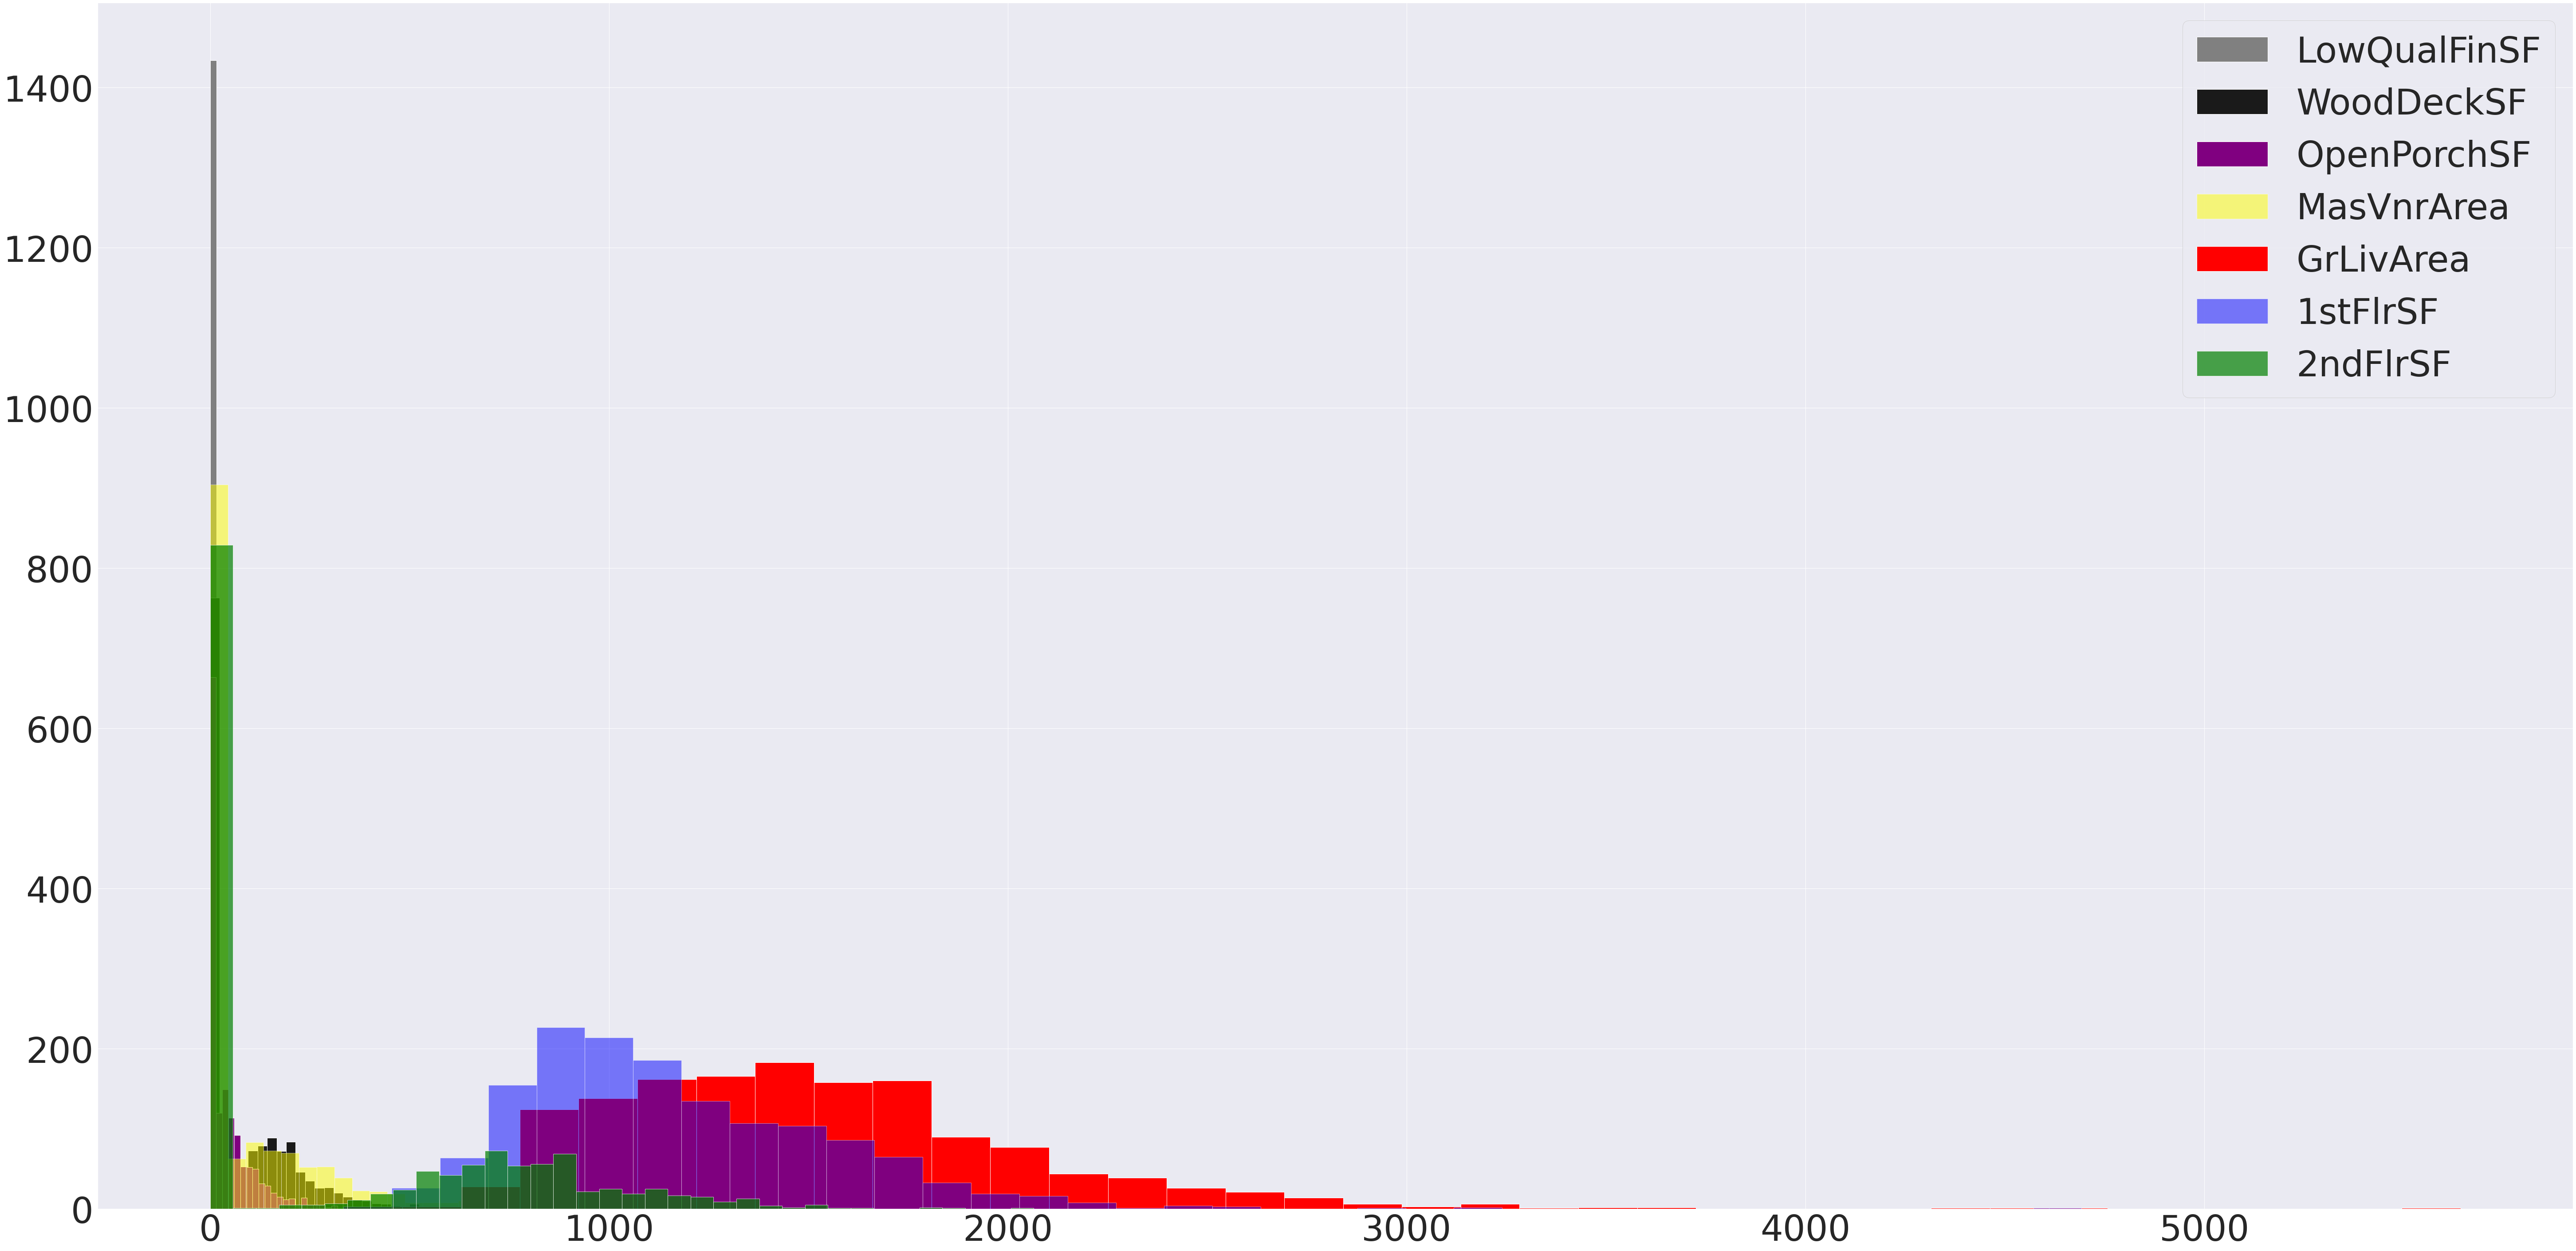

In [33]:
plt.figure(figsize= (100, 50))
train_data['LowQualFinSF'].hist(bins= int(180/5),grid=True,alpha=1,color='gray',label='LowQualFinSF')
train_data['WoodDeckSF'].hist(bins =int(180/5), grid=True,alpha=1,color= 'k',label='WoodDeckSF')
train_data['OpenPorchSF'].hist(bins =int(180/5),grid=True,alpha=1,color='purple',label= 'OpenPorchSF')
train_data['MasVnrArea'].hist(bins =int(180/5),grid=True,alpha=0.5,color='Yellow',label='MasVnrArea')
train_data['GrLivArea'].hist(bins = int(180/5), grid=True, alpha=1, color= 'Red', label= 'GrLivArea')
train_data['1stFlrSF'].hist(bins = int(180/5),grid=True, alpha=0.5, color= 'Blue', label= '1stFlrSF')
train_data['2ndFlrSF'].hist(bins = int(180/5),grid=True, alpha=0.7, color= 'green', label= '2ndFlrSF')
plt.legend(fontsize= 80)
plt.xticks(fontsize= 80)
plt.yticks(fontsize= 80)


In [34]:
train_data.loc[train_data['LowQualFinSF']>0,['GrLivArea','1stFlrSF','2ndFlrSF','LowQualFinSF']].head()

,GrLivArea,1stFlrSF,2ndFlrSF,LowQualFinSF
51,1176,816,0,360
88,1526,1013,0,513
125,754,520,0,234
170,1382,854,0,528
185,3608,1518,1518,572


correlation between 'GrLivArea' and ('1stFlrSF'+'2ndFlrSF'+'LowQualFinSF') is clearly 1, hence they can be dropped also ground living area greater than 4500 appears as outliers
> a new feature can be made representing if 2nd floor is present or not

In [35]:
train_data['2ndFlr']=np.where(train_data['2ndFlrSF']==0,0,1)
test_data['2ndFlr']=np.where(test_data['2ndFlrSF']==0,0,1)
print(train_data[['2ndFlr','2ndFlrSF']])

      2ndFlr  2ndFlrSF
0          1       854
1          0         0
2          1       866
3          1       756
4          1      1053
...      ...       ...
1455       1       694
1456       0         0
1457       1      1152
1458       0         0
1459       0         0

[1460 rows x 2 columns]


In [36]:
train_data=train_data.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1)

test_data=test_data.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1)

> majority of Ground living area is less than 4500 and rest are considered as outliers, since GrLivArea has highest priority, accuracy can be improved by eliminating those outliers

In [37]:
train_data=train_data.loc[(train_data['GrLivArea'] < 4500)]
target1=home_data.loc[(home_data['GrLivArea'] < 4500)]
target=target1['SalePrice']
print(train_data.shape,target.shape)

(1458, 80) (1458,)


<a id='step5.6.2'></a>

    5.6.2. Obserivng correlation between Quality variables(Since highest importance value is obtained for overall quality)

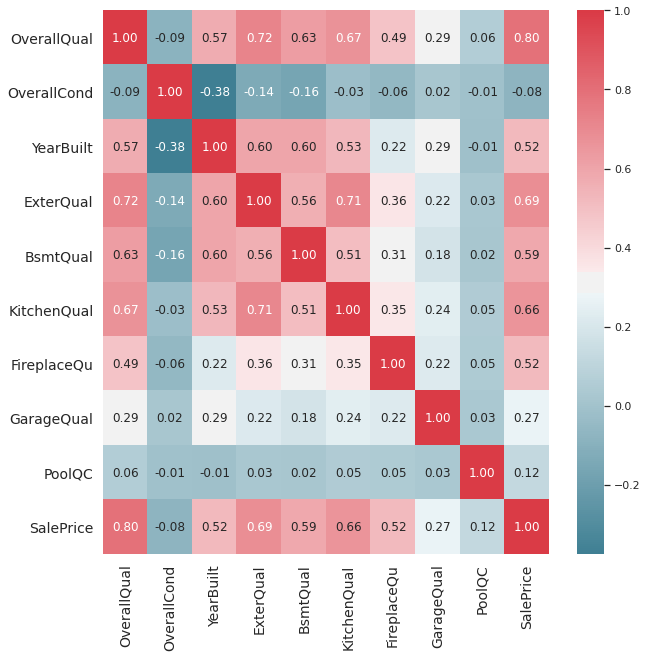

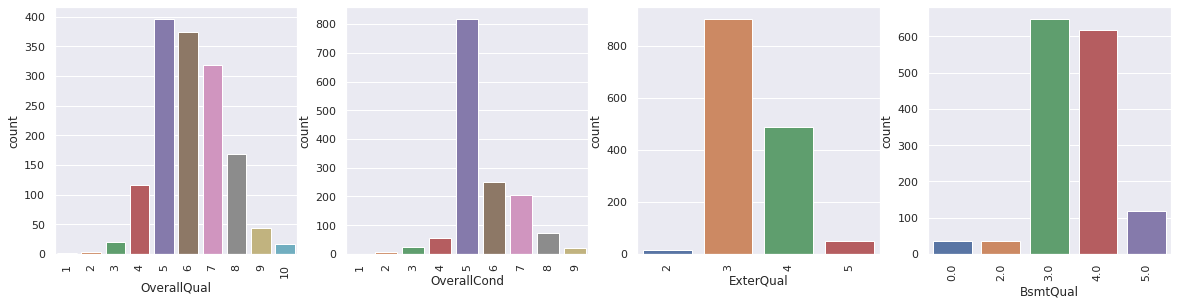

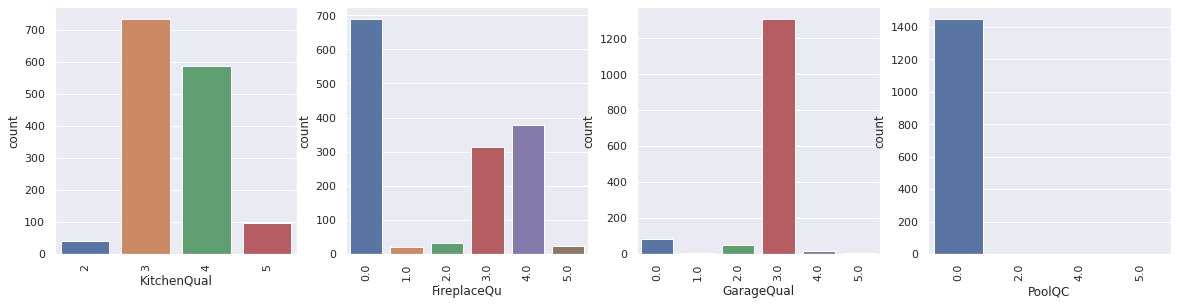

<Figure size 1440x720 with 0 Axes>

In [38]:
quality=['OverallQual','OverallCond','YearBuilt','ExterQual','BsmtQual',
        'KitchenQual','FireplaceQu','GarageQual','PoolQC']
corr = (pd.concat([train_data[quality], target],axis=1)).corr()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
sns.set(font_scale=1)
plt.show()

data1=train_data[quality]
i = 1
fig = plt.figure(figsize = (20,10))
for c in list(quality):
    if c!='YearBuilt':
        if i <= 4:
            ax1 = fig.add_subplot(2,4,i)
            sns.countplot(data = data1, x=c, ax = ax1, label= c)
            plt.xticks(rotation='vertical')            
        i = i +1
        if i == 5: 
            fig = plt.figure(figsize = (20, 10))
            i =1

> **pool quality has least effect and least information, hence it can be replaced by a column representing presence of pool or not**

In [39]:
train_data['Pool']=np.where(train_data['PoolArea']==0, 0,1)
test_data['Pool']=np.where(test_data['PoolArea']==0, 0,1)
train_data=train_data.drop(['PoolQC'],axis=1)
test_data=test_data.drop(['PoolQC'],axis=1)

<a id='step5.6.3'></a>

    5.6.3. Correlation between Basement variables

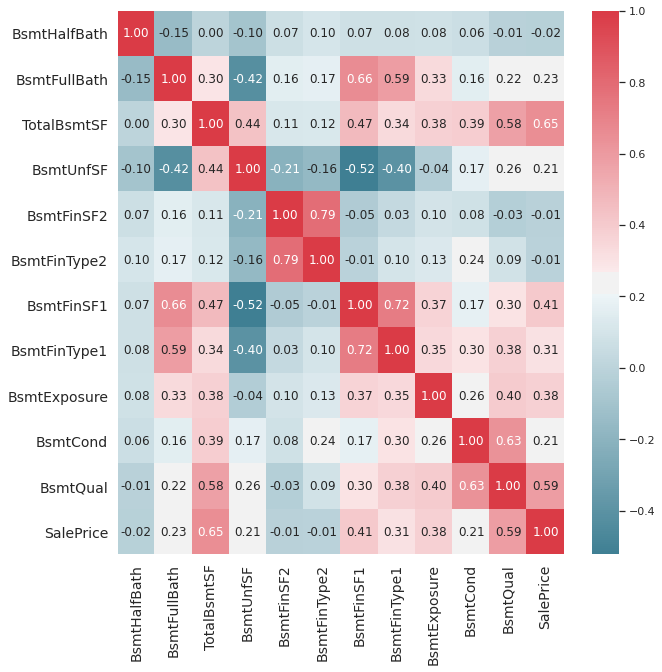

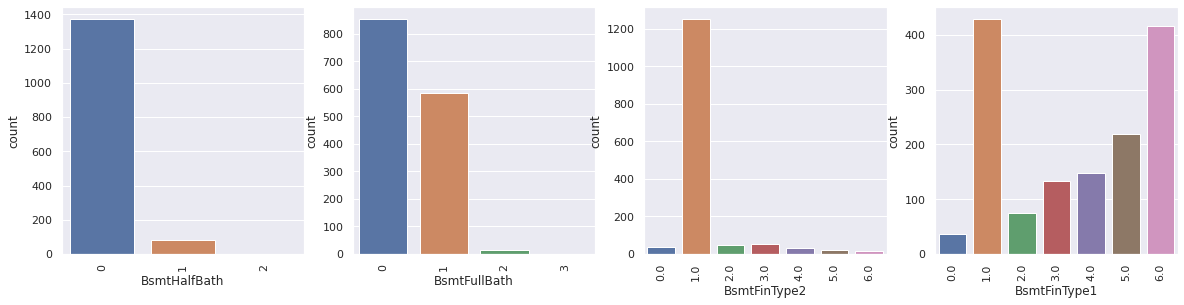

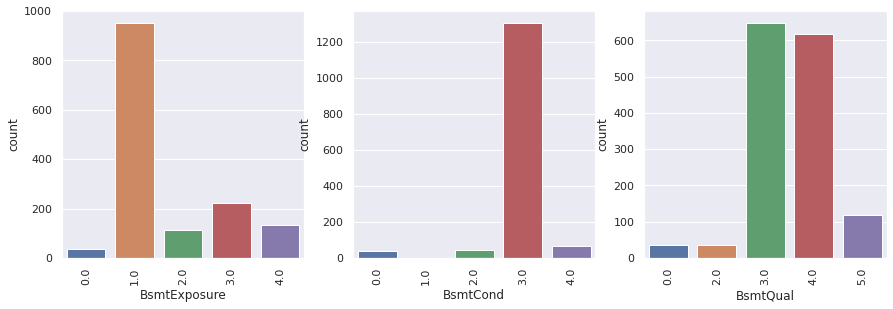

In [40]:
basement=['BsmtHalfBath','BsmtFullBath','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinType2',
          'BsmtFinSF1','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual']
corr = (pd.concat([train_data[basement],home_data['SalePrice']], axis=1)).corr()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
sns.set(font_scale=1)
plt.show()

data1=train_data[basement]
i = 1
fig = plt.figure(figsize = (20,10))
for c in list(basement):
    if c not in list(['TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1']):
        if i <= 4:
            ax1 = fig.add_subplot(2,4,i)
            sns.countplot(data = data1, x=c, ax = ax1, label= c)
            plt.xticks(rotation='vertical')            
        i = i +1
        if i == 5: 
            fig = plt.figure(figsize = (20, 10))
            i =1

In [41]:
train_data[['TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1']].head()

,TotalBsmtSF,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1
0,856,150,0,706
1,1262,284,0,978
2,920,434,0,486
3,756,540,0,216
4,1145,490,0,655


> the correlation between TotalBsmtSF and (BsmtUnfSF+ BsmtFinSF2 +BsmtFinSF1) is exactly 1 , hence they can be dropped and replaced by whether the types of basement are present or not

In [42]:
train_data['BsmtFin2']=np.where(train_data['BsmtFinSF2']==0,0,1)
test_data['BsmtFin2']=np.where(test_data['BsmtFinSF2']==0,0,1)


train_data['BsmtFin1']=np.where(train_data['BsmtFinSF1']==0,0,1)
test_data['BsmtFin1']=np.where(test_data['BsmtFinSF1']==0,0,1)

print(train_data[['BsmtFin2','BsmtFinSF2','BsmtFin1','BsmtFinSF1']].head())

   BsmtFin2  BsmtFinSF2  BsmtFin1  BsmtFinSF1
0         0           0         1         706
1         0           0         1         978
2         0           0         1         486
3         0           0         1         216
4         0           0         1         655


In [43]:
train_data=train_data.drop(['BsmtUnfSF', 'BsmtFinSF2','BsmtFinSF1'],axis=1)
test_data=test_data.drop(['BsmtUnfSF', 'BsmtFinSF2','BsmtFinSF1'],axis=1)

<a id='step5.6.4'></a>

    5.6.4. Coorelation between Garage variables

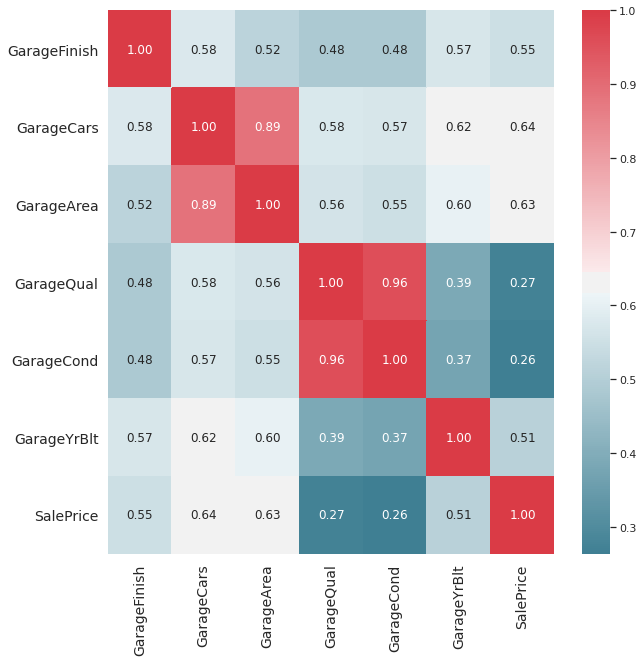

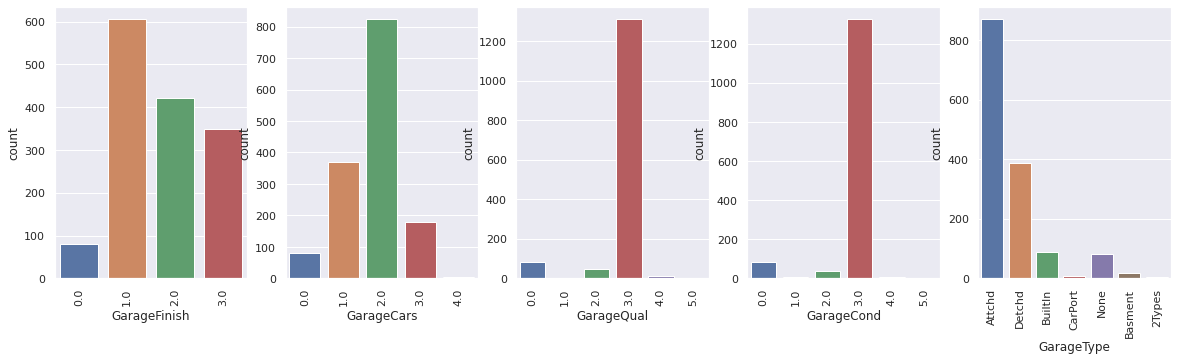

In [44]:
garage= ['GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','GarageYrBlt']
data1=pd.concat([train_data[garage],train_data['GarageType'],home_data['SalePrice']],axis=1)
corr = data1.corr()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
sns.set(font_scale=1)
plt.show()

i = 1
fig = plt.figure(figsize = (20,5))
for c in data1.columns:
    if c not in list(['GarageArea','GarageYrBlt']):
        if i <= 5:
            ax1 = fig.add_subplot(1,5,i)
            sns.countplot(data = data1, x=c, ax = ax1, label= c)
            plt.xticks(rotation='vertical')  
        i = i +1


1. > garage condition and garage quality are highly correlated, garage quality is more correlated with sales price. Hence garage condition is to be dropped
2. garage area is highlyt correlated with garage carsand garage cars is more correlated with sales price. Hence garage areais to be dropped

In [45]:
train_data=train_data.drop(['GarageCond', 'GarageArea'],axis=1)
test_data=test_data.drop(['GarageCond', 'GarageArea'],axis=1)

<a id='step5.6.5'></a>

    5.6.5. Dealing with all Bathroom features


0    3.5
1    2.5
2    3.5
3    2.0
4    3.5
Name: TotalBathrooms, dtype: float64


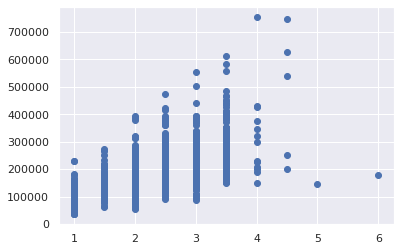

In [46]:
train_data['TotalBathrooms']= (train_data['FullBath']+0.5*train_data['HalfBath']+
                                train_data['BsmtFullBath']+0.5*train_data['BsmtHalfBath'])
print(train_data['TotalBathrooms'].head())
plt.scatter(x= train_data['TotalBathrooms'], y= target )
plt.show()

In [47]:
test_data['TotalBathrooms']= (test_data['FullBath']+0.5*test_data['HalfBath']+
                    test_data['BsmtFullBath']+0.5*test_data['BsmtHalfBath'])


<a id='step5.7'></a>

    5.7. Handling year features to obtain new feature and remove the columns year built, year remodelled

                Age  SalePrice
Age        1.000000  -0.509706
SalePrice -0.509706   1.000000


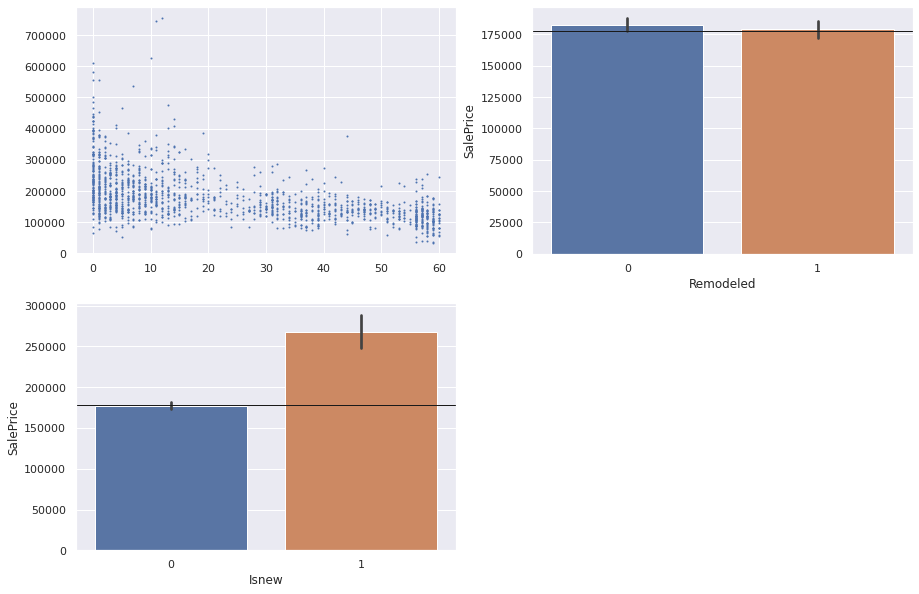

In [48]:
train_data['Age']= train_data['YrSold']-train_data['YearRemodAdd']
train_data['Remodeled']= np.where(train_data['YearRemodAdd']-train_data['YearBuilt']==0, 0, 1)
train_data['Isnew']=np.where(train_data['YrSold']-train_data['YearBuilt']==0, 1, 0)
# print(input_data[['Remodeled','Age']].head())

correlation=pd.concat([train_data['Age'],target],axis=1).corr()
print(correlation)

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.scatter(x=train_data['Age'], y= target,s=1)
plt.subplot(222)
sns.barplot(x=train_data['Remodeled'],y= target)
plt.axhline(y=178000,linewidth=1, color='k')
plt.subplot(223)
sns.barplot(x=train_data['Isnew'],y= target)
plt.axhline(y=178000,linewidth=1, color='k')
plt.show()

In [49]:
test_data['Age']= test_data['YrSold']-test_data['YearRemodAdd']
test_data['Remodeled']= np.where(test_data['YearRemodAdd']-test_data['YearBuilt']==0, 0, 1)
test_data['Isnew']=np.where(test_data['YrSold']-test_data['YearBuilt']==0, 1, 0)

print(test_data[['Remodeled','Age']])

      Remodeled  Age
0             0   49
1             0   52
2             1   12
3             0   12
4             0   18
...         ...  ...
1454          0   36
1455          0   36
1456          1   10
1457          0   14
1458          1   12

[1459 rows x 2 columns]


In [50]:
train_data=train_data.drop(['YearBuilt','YearRemodAdd'],axis=1)
test_data=test_data.drop(['YearBuilt','YearRemodAdd'],axis=1)

<a id='step5.8'></a>

    5.8. Neighbourhood has many categories and hece binning them


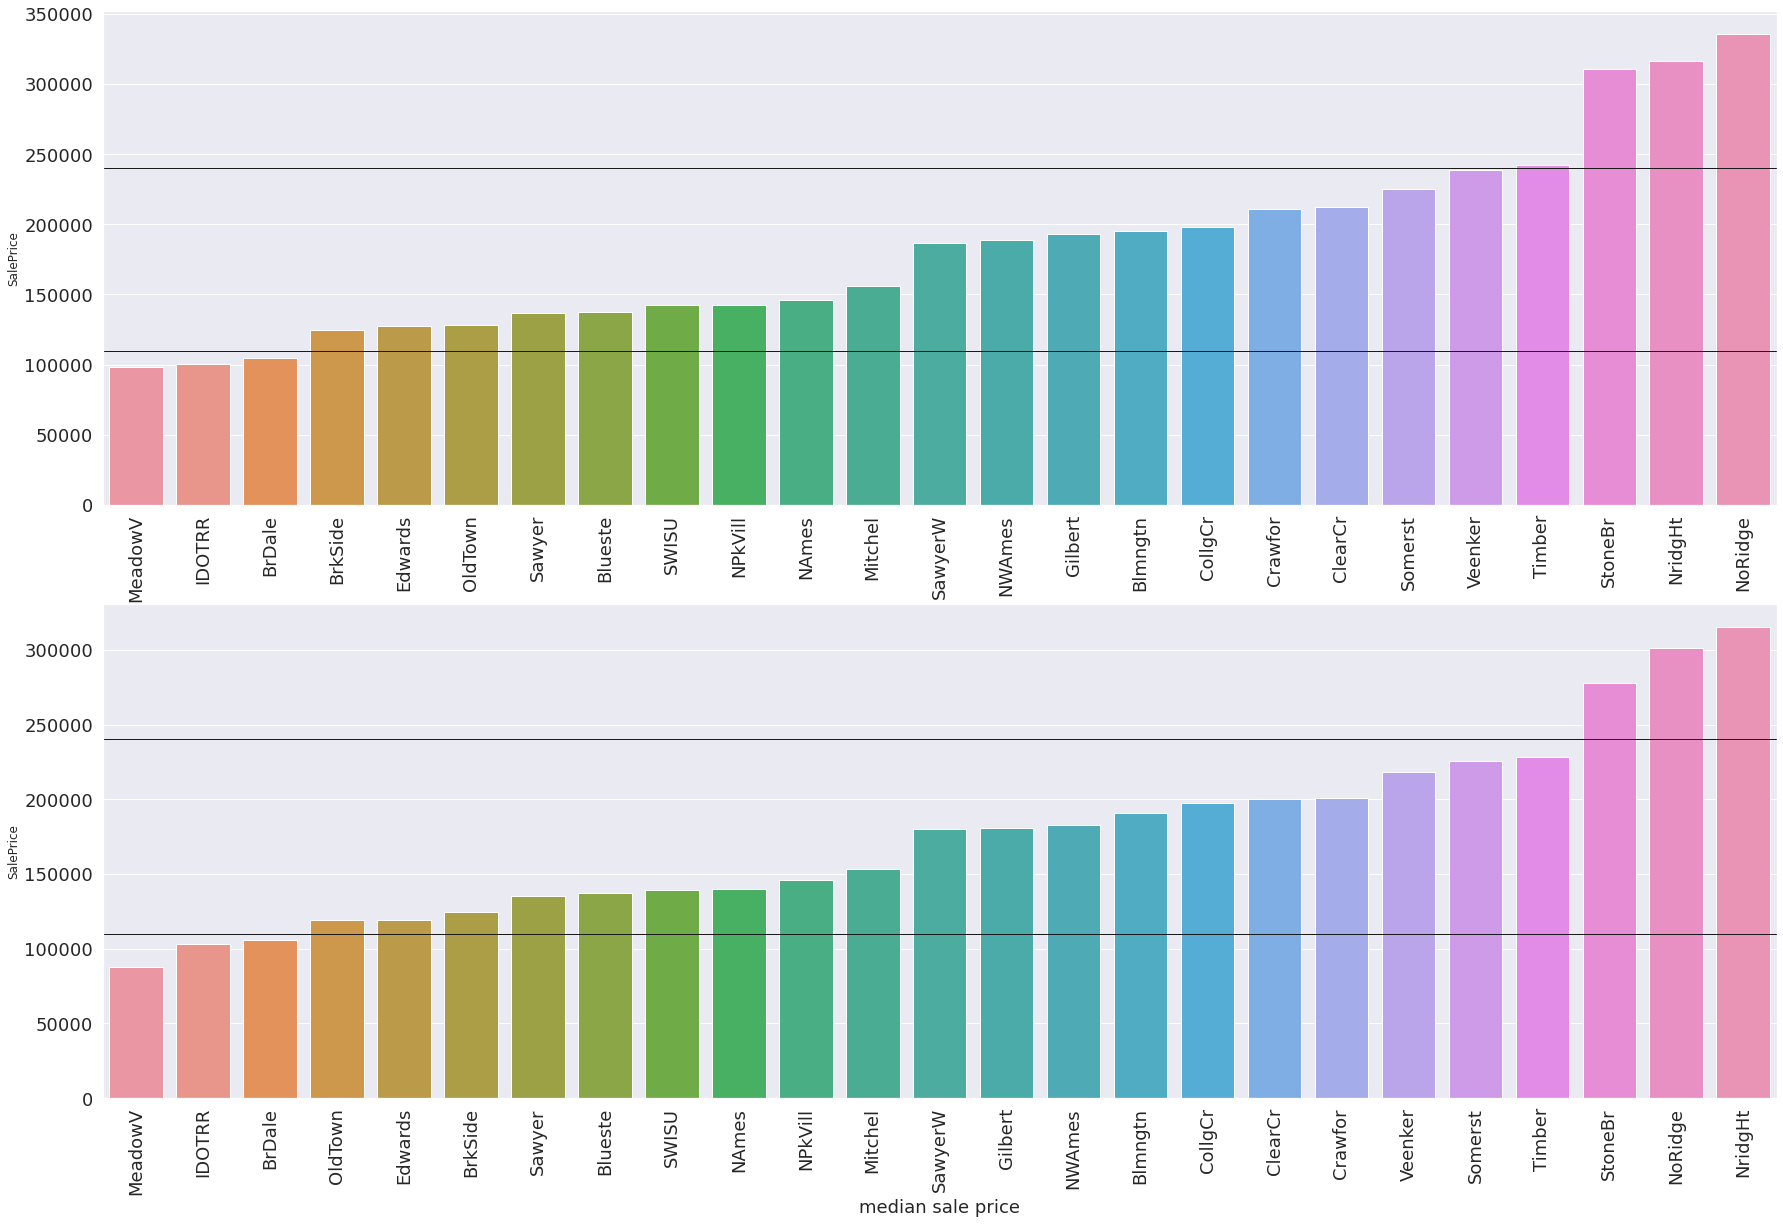

['MeadowV' 'IDOTRR' 'BrDale' 'OldTown' 'Edwards' 'BrkSide' 'Sawyer'
 'Blueste' 'SWISU' 'NAmes' 'NPkVill' 'Mitchel' 'SawyerW' 'Gilbert'
 'NWAmes' 'Blmngtn' 'CollgCr' 'ClearCr' 'Crawfor' 'Veenker' 'Somerst'
 'Timber' 'StoneBr' 'NoRidge' 'NridgHt'] 
 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


In [51]:
data4=pd.concat([target,train_data['Neighborhood']],axis=1)

data_41 = data4.groupby('Neighborhood', as_index=False)['SalePrice'].mean()
data_41=data_41.sort_values(['SalePrice','Neighborhood'], ascending=[1,0])

data_42 = data4.groupby('Neighborhood', as_index=False)['SalePrice'].median()
data_42=data_42.sort_values(['SalePrice','Neighborhood'], ascending=[1,0])

# print(data_41.head(),data_42.head()) 
plt.figure(figsize=(30,20))
plt.subplot(211)
plt.xlabel('mean sale price for each neighborhood', fontsize=18)
sns.barplot(x=data_41['Neighborhood'],y= data_41['SalePrice'])
plt.axhline(y=110000,linewidth=1, color='k')
plt.axhline(y=240000,linewidth=1, color='k')
plt.xticks(rotation='vertical', fontsize=18) 
plt.yticks(fontsize=18) 

plt.subplot(212)
sns.barplot(x=data_42['Neighborhood'],y= data_42['SalePrice'])
plt.axhline(y=110000,linewidth=1, color='k')
plt.axhline(y=240000,linewidth=1, color='k')
plt.xticks(rotation='vertical', fontsize=18) 
plt.xlabel('median sale price', fontsize=18)
plt.yticks(fontsize=18) 
plt.show()
print(data_42['Neighborhood'].unique(),'\n',train_data['Neighborhood'].unique())

> *avoiding overbinng, we can see that neighbourhood mean and median have same areas in each range, 3 very poor and 3 very rich neighbourhoods are seen clearly*

In [52]:
mapping= {'MeadowV':0, 'IDOTRR':0, 'BrDale':0,'StoneBr':2, 'NoRidge':2, 'NridgHt':2}
train_data['Neighborhood_bin']=train_data['Neighborhood'].map(mapping)
train_data['Neighborhood_bin']=train_data['Neighborhood_bin'].fillna('1')

test_data['Neighborhood_bin']=test_data['Neighborhood'].map(mapping)
test_data['Neighborhood_bin']=test_data['Neighborhood_bin'].fillna('1')
print(train_data['Neighborhood_bin'].value_counts(),'\n', test_data['Neighborhood_bin'].value_counts())

1      1245
2.0     143
0.0      70
Name: Neighborhood_bin, dtype: int64 
 1      1224
2.0     145
0.0      90
Name: Neighborhood_bin, dtype: int64


<a id='step5.9'></a>

    5.9. Handling Porch Area features
> creating a new porch feature consisting of total porch area

   TotalPorchArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0              61           0           61              0          0   
1             298         298            0              0          0   
2              42           0           42              0          0   
3             307           0           35            272          0   
4             276         192           84              0          0   

   ScreenPorch  
0            0  
1            0  
2            0  
3            0  
4            0  
                TotalPorchArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
TotalPorchArea        1.000000    0.743620     0.451927       0.215599   
WoodDeckSF            0.743620    1.000000     0.053686      -0.125616   
OpenPorchSF           0.451927    0.053686     1.000000      -0.092212   
EnclosedPorch         0.215599   -0.125616    -0.092212       1.000000   
3SsnPorch             0.133646   -0.032642    -0.005191      -0.037366   
ScreenPorch          

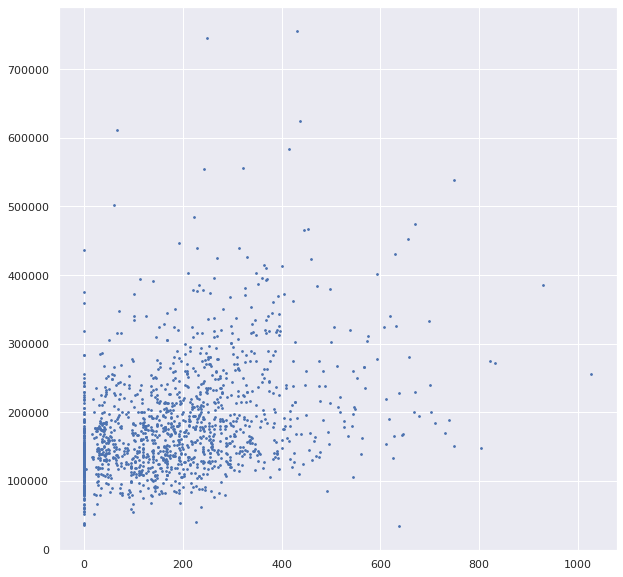

In [53]:
train_data['TotalPorchArea']= (train_data['WoodDeckSF']+train_data['OpenPorchSF']+
         train_data['EnclosedPorch']+ train_data['3SsnPorch']+train_data['ScreenPorch'])
plt.figure(figsize=(10,10))
plt.scatter(x=train_data['TotalPorchArea'], y= target,s=3)
print(train_data[['TotalPorchArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                 'ScreenPorch']].head()) 
correlation=(pd.concat([train_data[['TotalPorchArea','WoodDeckSF','OpenPorchSF',
            'EnclosedPorch','3SsnPorch','ScreenPorch']],home_data['SalePrice']],
                       axis=1)).corr()
print(correlation)
# x=train_data.loc[(train_data['TotalPorchArea'])==0]



> *the correlation with total porch area is highest with sales price compared to other porch variables, but not significant*

In [54]:
test_data['TotalPorchArea']=(test_data['WoodDeckSF']+test_data['OpenPorchSF']+
  test_data['EnclosedPorch']+ test_data['3SsnPorch']+test_data['ScreenPorch'])

> 3SSNPorch has least correlation with sales price and its area can be ignored, hence creating a new feature representing if it is present or not

In [55]:

train_data['Has3SSNPorch']=np.where(train_data['3SsnPorch']==0,0,1)
test_data['Has3SSNPorch']=np.where(test_data['3SsnPorch']==0,0,1)

# print(train_data[['TotalPorchArea','Has3SSNPorch','3SsnPorch']].head())

train_data.drop(['3SsnPorch'],axis=1)
test_data.drop(['3SsnPorch'],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,Pool,BsmtFin2,BsmtFin1,TotalBathrooms,Age,Remodeled,Isnew,Neighborhood_bin,TotalPorchArea,Has3SSNPorch
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,Inside,...,0,1,1,1.0,49,0,0,1,260,0
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,...,0,0,1,1.5,52,0,0,1,429,0
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,...,0,0,1,2.5,12,1,0,1,246,0
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,Inside,...,0,0,1,2.5,12,0,0,1,396,0
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,Inside,...,0,0,1,2.0,18,0,0,2,226,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,Inside,...,0,0,0,1.5,36,0,0,0,0,0
1455,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,Inside,...,0,0,1,1.5,36,0,0,0,24,0
1456,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,Inside,...,0,0,1,2.0,10,1,0,1,474,0
1457,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,Inside,...,0,0,1,1.5,14,0,0,1,112,0


<a id='step5.10'></a>

    5.10. Creating new feature Total Area:
>After removing highly correlated variables to GrLivArea, we see that a new variable can be made out of summing GrLivArea and TotalBsmtSF as total area since they both are highly correlated with Sale Price**

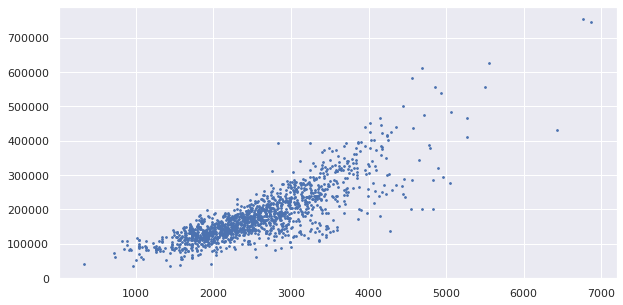

In [56]:
train_data['TotalArea']=train_data['GrLivArea']+train_data['TotalBsmtSF']
plt.figure(figsize=(10,5))
plt.scatter(x=train_data['TotalArea'],y=target,s=3)

In [57]:
 
correlation=(pd.concat([train_data['TotalArea'],target],axis=1)).corr()
print(correlation)

           TotalArea  SalePrice
TotalArea   1.000000   0.829042
SalePrice   0.829042   1.000000


*correlation between total area and sales price is very high and higher than ground living area, total basement separately*
*looking at correlation after removing outliers from train data,by considering only the examples in which groung area less than 4500*

In [58]:
test_data['TotalArea']=test_data['GrLivArea']+test_data['TotalBsmtSF']


<a id='step5.11'></a>

    5.11. Handling Collinearity (Dropping highly correlated variables)



1. > GrLiv area has high correlation with sales price compared to TotalBsmtSF, since Total area feature is present, TotalBsmtSF can be dropped.
2. > 'TotRmsAbvGrd' and GrLiv area have high correlation with each other but GrLiv area has higher coorelation  with sales price
3. > garage year built has high correlation with year built(see 1st heat map)and year built has high correlation with sale price


In [59]:

drop=['YrSold','MoSold','MSSubClass', 'GarageYrBlt','TotalBsmtSF',
      'TotRmsAbvGrd']
train_data=train_data.drop(drop,axis=1)
test_data=test_data.drop(drop,axis=1)
print(train_data.columns, train_data.shape)

Index(['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'MiscFeature', 'MiscVal',
       'SaleType', 'SaleCondition', 'MSSubClass_o', 'YrSold_o', 'MoSold_o',
       '2ndFlr', 'Pool', 

In [60]:
category=(train_data.select_dtypes(include=['object']).copy()).columns
category=list(category)+['OverallQual', 'OverallCond']
dummy=list(set(category)-set(['MoSold','YrSold']))
non_category=list( set(train_data.columns) - set(category))

print((category))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass_o', 'YrSold_o', 'MoSold_o', 'Neighborhood_bin', 'OverallQual', 'OverallCond']


<a id='step5.12'></a>

    5.12. Handling skewness in each feature

BsmtCond       -3.698126
BsmtHalfBath    4.100114
Has3SSNPorch    7.608273
GarageFinish    0.122129
Id              0.000165
dtype: float64
None ['BsmtCond', 'BsmtHalfBath', 'Has3SSNPorch', 'GrLivArea', 'ScreenPorch', 'Isnew', 'OpenPorchSF', 'Pool', 'MasVnrArea', 'TotalArea', 'ExterQual', 'CentralAir', 'BsmtQual', 'WoodDeckSF', 'LotArea', 'PoolArea', 'KitchenAbvGr', 'BsmtFin2', 'ExterCond', 'BsmtExposure', 'TotalPorchArea', 'BsmtFinType2', 'GarageQual', '3SsnPorch', 'MiscVal', 'EnclosedPorch']
0 0
   BsmtCond  BsmtHalfBath  Has3SSNPorch  GrLivArea  ScreenPorch  Isnew  \
0  1.386294      0.000000           0.0   7.444833          0.0    0.0   
1  1.386294      0.693147           0.0   7.141245          0.0    0.0   
2  1.386294      0.000000           0.0   7.488294          0.0    0.0   
3  1.609438      0.000000           0.0   7.448916          0.0    0.0   
4  1.386294      0.000000           0.0   7.695758          0.0    0.0   

   OpenPorchSF  Pool  MasVnrArea  TotalArea  ...  Ki

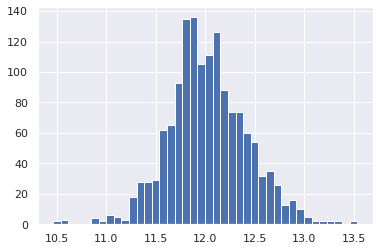

In [61]:
skewValue = train_data[non_category].skew(axis=0)
data=[]
for i,index in enumerate(skewValue):
    if abs(index)>0.8:
        data.append(non_category[i])
print(print(skewValue.head()),data)
print(train_data.isnull().sum().sum(),test_data.isnull().sum().sum())

train_data[data]=np.log1p(train_data[data])
target=np.log1p(target)
target.hist(bins = 40)
print(train_data[data].head())

In [62]:
test_data[data]=np.log1p(test_data[data])

<a id='step5.13'></a>


    5.13. One hot encoding

In [63]:
total_data =pd.concat([train_data,test_data],axis=0)
len=train_data.shape[0]
print('total length:',len)
total_dummy=pd.get_dummies(total_data, columns=dummy,drop_first=True)

train_data_final= total_dummy[0:len]
test_data_final=total_dummy[len:]
print(train_data_final.shape, target.shape)

total length: 1458
(1458, 254) (1458,)


<a id='step6'></a>

6. Creating Models and grid search for each model for finding best hyper parameters

In [64]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge, Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer  
from sklearn import metrics 
from sklearn.model_selection import cross_val_score,KFold
 

kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)
scaler = RobustScaler()
robust_scaled_df = scaler.fit_transform(train_data_final)
robust_scaled_test = scaler.fit_transform(test_data_final)

<a id='step6.1'></a>

    6.1.  Ridge Regression

In [65]:
# # [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1,10,20,50,100,150,200]
# param_rcv={'alpha':np.arange(1,5,1)}
# gs_rcv=GridSearchCV(Ridge(),param_rcv,cv=kfolds,
#                     scoring='neg_mean_squared_error',verbose=3)
# gs_rcv.fit(robust_scaled_df,target)  
# print('optimal estimator: %s' % gs_rcv.best_estimator_)
# rmse1 = cv_rmse(gs_rcv.best_estimator_, robust_scaled_df, target)
# print("Ridge score: {:.4f} ({:.4f})\n".format(rmse1.mean(),rmse1.std()))




> optimal estimator: Ridge(alpha=4)
    
    Ridge score: 0.1180 (0.0092)



<a id='step6.2'></a>
   
    6.2. Lasso

In [66]:
# # [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1,10,20,50,100,150,200],
# param_lcv={'max_iter':np.arange(12000,15000,1000),
#            'alpha':[1e-5, 1e-4, 1e-3, 1e-2]}
# gs_lcv=GridSearchCV(Lasso(),param_lcv,scoring='neg_mean_squared_error',
#                     verbose=3,cv=kfolds)
# gs_lcv.fit(robust_scaled_df,target)     
# print('optimal estimator: %s' % gs_lcv.best_estimator_)
# rmse2 = cv_rmse(gs_lcv.best_estimator_, robust_scaled_df, target)
# print("Lasso score: {:.4f} ({:.4f})\n".format(rmse2.mean(),rmse2.std()))


Lasso model has convergence issues below 12000 iterations
   >optimal estimator: Lasso(alpha=0.0001, max_iter=12000)
       
    Lasso score: 0.1179 (0.0082)


<a id='step6.3'></a>

    6.3. ElasticNet

In [67]:
# # [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1,10,20,50,100,150,200]
# param_encv={'max_iter':[5e5,1e6,5e6,1e7,5e7,1e8],
#             'alpha':[1e-5, 1e-4, 1e-3, 1e-2],
#             'l1_ratio':np.arange(0.1,0.5,0.1)}
# gs_encv=GridSearchCV(ElasticNet(),param_encv,scoring='neg_mean_squared_error',
#                      verbose=3,cv=kfolds)
# gs_encv.fit(robust_scaled_df,target)  
# print('optimal estimator: %s' % gs_encv.best_estimator_)
# rmse3 = cv_rmse(gs_encv.best_estimator_, robust_scaled_df, target)
# print("ElasticNet score: {:.4f} ({:.4f})\n".format(rmse3.mean(),rmse3.std()))

Iterations below 1e5 have convergence issues and greater than 1e9 has overflow error.
  >optimal estimator: ElasticNet(alpha=0.001, l1_ratio=0.2, max_iter=500000.0)
             
    ElasticNet score: 0.1169 (0.0092)



<a id='step6.4'></a>

    6.4. SVR

In [68]:
# param_svr={'C':np.arange(20,30,1),
#            'epsilon':[1e-5,1e-4,1e-3,5e-3,1e-2,5e-2,1e-1,5e-1],
#             'gamma':[1e-6,1e-5,1e-4,1e-3,1e-2, 1e-1]}
# gs_svr=GridSearchCV(SVR(),param_svr,scoring='neg_mean_squared_error',
#                     cv=kfolds,verbose=3)
# gs_svr.fit(robust_scaled_df,target)  
# print('optimal estimator: %s' % gs_svr.best_estimator_)
# rmse4 = cv_rmse(gs_svr.best_estimator_, robust_scaled_df, target)
# print("svr score: {:.4f} ({:.4f})\n".format(rmse4.mean(),rmse4.std()))


    optimal estimator: SVR(C=21, epsilon=0.01, gamma=0.001)
    svr score: 0.1126 (0.0094)


<a id='step6.5'></a>

    6.5. XGBoost

In [69]:
# # 'n_estimators':np.arange(100,2000,200),'l_rate':[1e-5,1e-4,1e-3,1e-2,1e-1],
# # 'colsample_bytree':np.arange(0.1,1, 0.2)}
# param_xgb={'n_estimators':[5000],'booster': ["gbtree"],
#            'objective':['reg:squarederror'],           
#            'learning_rate':[0.01],'max_depth':[7],
#           'min_child_weight':[5],'subsample':[0.7],'reg_alpha':[0],
#           'colsample_bytree':[0.7],'gamma':[0],
#            'reg_lambda':[0.8]}
# #            
# gs_xgb=GridSearchCV(XGBRegressor(),param_grid=param_xgb,
#                     scoring='neg_mean_squared_error',cv=3,verbose=3)
# gs_xgb.fit(robust_scaled_df,target)  
# print('optimal estimator: %s' % gs_xgb.best_estimator_)
# rmse5 = cv_rmse(gs_xgb.best_estimator_, robust_scaled_df, target)
# print("xgb score: {:.4f} ({:.4f})\n".format(rmse5.mean(),rmse5.std()))

    optimal estimator: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,importance_type='gain',learning_rate=0.01, max_delta_step=0, max_depth=7,min_child_weight=5,n_estimators=5000, n_jobs=0, num_parallel_tree=1, random_state=0,reg_alpha=0, reg_lambda=0.8, scale_pos_weight=1, subsample=0.7,tree_method='exact', validate_parameters=1, verbosity=None)
        xgb score: 0.1200 (0.0088)



<a id='step6.6'></a>

    6.6. GradientBoostingRegressor

In [70]:
# param_gbr = {
#              'learning_rate': [0.1],'n_estimators': [400],'verbose':[0],
#             'min_samples_split' :[41],'min_samples_leaf': [8],
#             'subsample': [0.6],'max_depth':[4],
#             'max_features':[9]  
#              }
# #  

# gs_gbr=GridSearchCV(GradientBoostingRegressor(),param_grid=param_gbr,
#                     scoring='neg_mean_squared_error',cv=5,verbose=3)
# gs_gbr.fit(robust_scaled_df,target)  
# print('optimal estimator: %s' % gs_gbr.best_estimator_)

# rmse6 = cv_rmse(gs_gbr.best_estimator_, robust_scaled_df, target)
# print("gbr score: {:.4f} ({:.4f})\n".format(rmse6.mean(),rmse6.std()))

    optimal estimator:GradientBoostingRegressor(max_depth=4, max_features=9,min_samples_leaf=8, min_samples_split=41,
        n_estimators=400, subsample=0.6)
gbr score: 0.1244 (0.0096)

<a id='step6.7'></a>

    6.7. Saving models and training them.

In [71]:
ridge=Ridge(alpha=4.0)
lasso=Lasso(alpha=0.0001, max_iter=12000)
elasticnet=ElasticNet(alpha=0.001, l1_ratio=0.2, max_iter=500000.0)
svr=SVR(C=21, epsilon=0.01, gamma=0.001)

xgboost=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1,validate_parameters=1, verbosity=None,
            colsample_bytree=0.7, gamma=0, gpu_id=-1,importance_type='gain',
        learning_rate=0.01, max_delta_step=0, max_depth=7,min_child_weight=5,
n_estimators=5000, n_jobs=0, num_parallel_tree=1, random_state=0,reg_alpha=0,
    reg_lambda=0.8,scale_pos_weight=1, subsample=0.7,tree_method='exact')

gbr=GradientBoostingRegressor(max_depth=4, max_features=9, min_samples_leaf=8,
                        min_samples_split=41, n_estimators=400,subsample=0.6)


In [72]:
elastic_model = elasticnet.fit(robust_scaled_df,target)

lasso_model = lasso.fit(robust_scaled_df,target)

ridge_model = ridge.fit(robust_scaled_df,target)

svr_model = svr.fit(robust_scaled_df,target)

xgb_model = xgboost.fit(robust_scaled_df,target)

gbr_model=gbr.fit(robust_scaled_df,target)
print(target)

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1458, dtype: float64


<a id='step6.8'></a>

    6.8. Stacking Regressor
        Stacking improves accuracy

In [73]:
from mlxtend.regressor import StackingCVRegressor
stack_gen=StackingCVRegressor(regressors=[ridge,lasso,elasticnet,
                                          xgboost,svr,gbr],
                 meta_regressor=xgboost,use_features_in_secondary=True)

stack_model=stack_gen.fit(robust_scaled_df,target)

scores = cross_val_score(stack_gen,robust_scaled_df,target, cv=10)

print(scores.mean(), scores.std())

0.918281452643282 0.019521553223260418


 meta_regressor=xgboost:  
 
     scores.mean()=0.91751898492917 ,scores.std=0.02215314970159242

>  RMSE summary:
    1. > xgb score:  0.1200 (0.0088)
    2. > svr score:  0.1126 (0.0094)
    3. > ElasticNet score:  0.1169 (0.0092)
    4. > Lasso score:  0.1179 (0.0082)
    5. > Ridge score: 0.1180 (0.0092)
    6. >gbr score: 0.1244 (0.0096)

<a id='step7'></a>

**7. Ensembling and obtaining output**

In [74]:
average_output= (0.1*elastic_model.predict(robust_scaled_test)+
                 0.02*lasso_model.predict(robust_scaled_test)+
                    0.01*ridge_model.predict(robust_scaled_test)+
                       0.25* svr_model.predict(robust_scaled_test)+
                         0.6* stack_model.predict(robust_scaled_test)+
                            0.01*xgb_model.predict(robust_scaled_test)+
                            0.01*gbr_model.predict(robust_scaled_test))
final_output= np.expm1(average_output)
print(final_output,average_output)

[127812.42419267 171561.73676756 188939.51839077 ... 166871.67998228
 128099.34151921 218732.91036899] [11.75832686 12.05270429 12.14918753 ... 12.02498641 11.76056915
 12.29561125]


In [75]:
test_preds=np.around(final_output,1)
print(test_preds)

output = pd.DataFrame({'Id':Id.astype('Int32'),
                      'SalePrice': test_preds})
output.to_csv('house_pred.csv', index=False)


[127812.4 171561.7 188939.5 ... 166871.7 128099.3 218732.9]


<a id='step8'></a>


**8. References**

* https://www.kaggle.com/erikbruin/house-prices-lasso-xgboost-and-a-detailed-eda
* https://www.kaggle.com/itslek/blend-stack-lr-gb-0-10649-house-prices-v57
